#Let's Begin

In [1]:
!pip uninstall torch torchvision -y
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121


Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [3]:
# This code is solely to Down load my Kaggle.json API key stored on my Google Drive
# Install gdown if not already installed
!pip install gdown

# Define the file ID and download URL
file_id = "1fH7oDV8mCH4jUkjAd9_gcvWyb3LFX56A"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
import gdown
gdown.download(download_url, output="kaggle.json", quiet=False)

print("File downloaded successfully!")

Downloading...
From: https://drive.google.com/uc?id=1fH7oDV8mCH4jUkjAd9_gcvWyb3LFX56A
To: /content/kaggle.json
100%|██████████| 65.0/65.0 [00:00<00:00, 146kB/s]

File downloaded successfully!


In [4]:
# Install the Kaggle API
# The Kaggle API is used to fetch datasets directly from Kaggle.
!pip install kaggle --upgrade

In [5]:
import os  # Provides functions to interact with the operating system, such as file and directory manipulation.
import shutil  # Used for high-level file operations like copying, moving, and removing files or directories.
import numpy as np  # A library for numerical computations, especially working with arrays and matrices.
from PIL import Image  # Used for opening, manipulating, and saving image files.
from torch.utils.data import Dataset, DataLoader, random_split  # Utilities from PyTorch for handling datasets, loading them, and splitting into subsets.
import torch  # The core PyTorch library for tensor computation and building neural networks.
from torchvision import transforms  # Provides common image transformations, such as resizing, normalizing, and augmenting images.
import matplotlib.pyplot as plt  # Used for data visualization, particularly plots and graphs.
import torch.nn as nn  # Provides building blocks for neural networks, such as layers and loss functions.
import torch.nn.functional as F  # Offers additional neural network functions not included as layers, like activation functions.
from torchsummary import summary  # Displays a summary of a PyTorch model's architecture, including layers and parameter counts.
import torch.optim as optim  # Contains optimization algorithms, such as SGD and Adam, for updating model weights during training.

# Kaggle Authentication and Dataset Download
def download_and_extract_dataset(dataset_id, kaggle_json_path, output_dir):
    """
    Downloads and extracts a Kaggle dataset. Handles Kaggle API authentication
    and ensures the data is stored in the specified output directory.
    """


    if not os.path.exists(kaggle_json_path):
        # Check if the Kaggle API key file exists at the specified path.
        # Raise an error if the file is not found.
        raise FileNotFoundError(f"Kaggle JSON file not found at {kaggle_json_path}.")

    # Authenticate Kaggle API
    os.makedirs(os.path.expanduser("~/.kaggle/"), exist_ok=True)
    # Create the .kaggle directory in the user's home directory, if it doesn't already exist.
    shutil.copy(kaggle_json_path, os.path.expanduser("~/.kaggle/kaggle.json"))
    # Copy the Kaggle JSON file (API key) to the .kaggle directory.
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
    # Set the permissions of the Kaggle JSON file to read and write only by the user (security measure).
    print("Kaggle API authenticated successfully.")
    # Print a success message to confirm the Kaggle API is ready to use.


    # Delete existing dataset directory if it exists
    if os.path.exists(output_dir):
        # Check if the output directory (where the dataset will be stored) already exists.
        shutil.rmtree(output_dir)
        # Delete the existing directory and its contents to ensure a fresh download.
        print(f"Old dataset at {output_dir} deleted.")


    # Download and extract the dataset
    os.makedirs(output_dir, exist_ok=True)
    # Recreate the output directory in case it was deleted earlier or does not exist.
    os.system(f"kaggle datasets download -d {dataset_id} -p {output_dir} --unzip")
    # Use the `kaggle` command-line tool to download the dataset.
    # `-d {dataset_id}` specifies the unique ID of the Kaggle dataset to download.
    # `-p {output_dir}` specifies the directory where the dataset should be saved.
    # `--unzip` extracts the dataset immediately after downloading.
    print(f"Dataset downloaded and extracted to {output_dir}")
    # Print a success message to confirm the dataset is ready for use.



In [6]:
# Define the Dataset Class for Pretrained ResNet
class PretrainedASLDataset(Dataset):
    """
    Custom PyTorch Dataset class to load and preprocess images for ASL classification,
    specifically designed for pre-trained models.
    """
    def __init__(self, data_dir, classes, transform=None):
        """
        Initialize the dataset by loading all images and their corresponding labels.

        Args:
            data_dir (str): Path to the dataset directory containing class subfolders.
            classes (list): List of class names (e.g., '0', '1', 'a', 'b', etc.).
            transform (callable, optional): Transformations to apply to the images.
        """
        self.data = []  # List to store image objects.
        self.labels = []  # List to store corresponding labels.
        self.transform = transform  # Transformations to apply (if any).
        self.classes = classes  # Store the class names.

        # Load images and labels from the dataset directory.
        for label, class_name in enumerate(classes):  # Enumerate to assign labels to classes.

            folder_path = os.path.join(data_dir, class_name)  # Path to the folder for this class.

            if os.path.isdir(folder_path):  # Check if the folder exists.
                for file_name in os.listdir(folder_path):  # Iterate over all files in the folder.
                    file_path = os.path.join(folder_path, file_name)  # Full path to the image file.
                    if os.path.isfile(file_path):  # Ensure it's a valid file.
                        try:
                            # Open the image and ensure it is in RGB format.
                            img = Image.open(file_path).convert("RGB")
                            self.data.append(img)  # Add the image to the data list.
                            self.labels.append(label)  # Add the corresponding label.
                        except Exception as e:
                            # Print an error message if the image cannot be loaded.
                            print(f"Error loading image {file_path}: {e}")
            else:
                # Warn if the class folder is missing or empty.
                print(f"Warning: Class folder '{class_name}' is missing or empty.💀")

    def __len__(self):
        """
        Returns the total number of samples in the dataset.
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Retrieves an image and its label at the specified index.

        Args:
            idx (int): Index of the sample to retrieve.

        Returns:
            tuple: Transformed image and corresponding label.
        """
        image = self.data[idx]  # Get the image at the specified index.
        label = self.labels[idx]  # Get the corresponding label.
        if self.transform:
            # Apply transformations if specified.
            image = self.transform(image)
        return image, label  # Return the image and label as a tuple.


# Prepare Dataset for Pretrained ResNet
def prepare_pretrained_datasets(data_dir, class_subset, train_transform, test_transform):
    """
    Prepares training, validation, and test datasets with appropriate transformations
    for pre-trained ResNet models.

    Args:
        data_dir (str): Path to the dataset directory.
        class_subset (list): List of class names to include in the dataset.
        train_transform (callable): Transformations for the training set.
        test_transform (callable): Transformations for validation and test sets.

    Returns:
        tuple: Train, validation, and test datasets.
    """
    dataset = PretrainedASLDataset(data_dir, class_subset, transform=None)
    # Initialize the dataset without transformations.

    if len(dataset) == 0:
        # Raise an error if the dataset is empty.
        raise ValueError("The dataset is empty. Please check the dataset directory and class subset.")

    # Define split sizes for training, validation, and testing sets.
    train_size = int(0.7 * len(dataset))  # 70% of the data for training.
    valid_size = int(0.15 * len(dataset))  # 15% of the data for validation.
    test_size = len(dataset) - train_size - valid_size  # Remaining 15% for testing.

    # Use random_split to divide the dataset into train, validation, and test subsets.
    train_dataset, valid_dataset, test_dataset = random_split(
        dataset, [train_size, valid_size, test_size], generator=torch.Generator().manual_seed(42)
        # Set a fixed seed for reproducibility.
    )

    # Assign transformations to each subset.
    train_dataset.dataset.transform = train_transform  # Apply training transformations.
    valid_dataset.dataset.transform = test_transform  # Apply validation transformations.
    test_dataset.dataset.transform = test_transform  # Apply testing transformations.

    return train_dataset, valid_dataset, test_dataset


# Visualize Dataset (One Image per Class)
def visualize_pretrained_classes(data_loader, class_subset):
    """
    Visualizes one example image per class in the dataset for pre-trained model visualization.

    Args:
        data_loader (DataLoader): DataLoader object for the dataset.
        class_subset (list): List of class names.
    """
    # Dictionary to store one sample image for each class.
    samples_per_class = {class_label: None for class_label in range(len(class_subset))}

    # Iterate through the DataLoader to retrieve images and labels.
    for images, labels in data_loader:
        for img, label in zip(images, labels):
            if samples_per_class[label.item()] is None:
                # Save the first image found for this class.
                samples_per_class[label.item()] = img
            if all(v is not None for v in samples_per_class.values()):
                # Stop once we have one image for each class.
                break

    # Create a subplot to visualize the images.
    fig, axes = plt.subplots(1, len(samples_per_class), figsize=(15, 5))
    for idx, (class_label, image) in enumerate(samples_per_class.items()):
        # Rearrange the image tensor to Height-Width-Channel (HWC) format for plotting.
        image = image.permute(1, 2, 0)
        # Denormalize the image (if normalized earlier).
        image = (image * 0.5) + 0.5
        axes[idx].imshow(image)  # Display the image.
        axes[idx].set_title(f"Class {class_label}")  # Add the class label as the title.
        axes[idx].axis("off")  # Remove axis lines and ticks for clarity.
    plt.tight_layout()  # Adjust subplot spacing.
    plt.show()  # Display the plot.


In [7]:
# For interactive plots in Colab
%matplotlib notebook

# forces all plots to render inline in Colab cells
%matplotlib inline

# ensure plots are rendered correctly
import matplotlib
matplotlib.use('Agg')  # Explicitly set backend for compatibility

# Reconfigure Colab's rendering backend directly:
%matplotlib inline
import matplotlib.pyplot as plt

plt.ioff()  # Disable interactive mode if conflicting


# **Considerations**

Base Model:

- Replaced the custom CNN model with the pre-trained resnet18 from torchvision.models.

Layer Freezing:

- Introduced an option to freeze all layers (freeze_layers=True) for feature extraction.
- If freeze_layers=False, all layers will be trainable, enabling fine-tuning.

Fully Connected Layer Replacement:

- The original FC layer of ResNet18 is replaced with a custom layer to output the required number of classes.


Simplified Forward Pass:

- ResNet18 model encapsulates all the convolutional layers, pooling, and dense layers so custom logic is not necessary as it would be in a scratch model.
- The forward method simply passes the input tensor x through the pre-trained model (self.base_model).

Pre-trained Model Pipeline:

- ResNet18 already includes optimized processing steps (e.g., convolutional layers, pooling, and activation functions).
- The final output layer is replaced to match the required number of classes.

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from torchvision.models import resnet18

# Pre-trained ResNet18 Model for Classification
class PretrainedASLClassifierResNet18(nn.Module):
    def __init__(self, num_classes, freeze_layers=True):
        """
        Initialize the pre-trained ResNet18 model for ASL classification.

        Args:
            num_classes (int): Number of output classes (e.g., 36 for ASL digits and letters).
            freeze_layers (bool): Whether to freeze layers during training for feature extraction.
        """
        super(PretrainedASLClassifierResNet18, self).__init__()  # Initialize the parent `nn.Module` class.

        # Load the pre-trained ResNet18 model
        self.base_model = resnet18(pretrained=True)

        if freeze_layers:
            # Freeze all layers in the pre-trained model
            for param in self.base_model.parameters():
                param.requires_grad = False

        # Replace the fully connected (FC) layer for ASL classification
        num_features = self.base_model.fc.in_features  # Get the number of input features for the FC layer
        self.base_model.fc = nn.Linear(num_features, num_classes)  # Replace FC layer with one for `num_classes`

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (Tensor): Input tensor of shape (batch_size, 3, height, width).

        Returns:
            Tensor: Output predictions for each class.
        """
        return self.base_model(x)  # Forward pass through the pre-trained model


# **Key Differences from Scratch Model**

Pre-trained Model Compatibility:


- The model parameter is expected to be the pre-trained ResNet18 model initialized with the updated fully connected layer.

Freezing Layers:


- Ensure during model initialization that earlier layers are frozen, and training fine-tunes only specific layers.

Loss and Metrics:


- The logic for computing loss and metrics remains the same

Scheduler:

- The scheduler adjusts the learning rate at each epoch.

Device Handling:

- Explicitly moves data to the device (cuda or cpu) for both training and validation phases.

In [9]:
def train_fine_tuned_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs, device):
    """
    Train and validate the pre-trained ResNet18 model.

    Args:
        model (nn.Module): The pre-trained ResNet18 model to train.
        train_loader (DataLoader): DataLoader for the training dataset.
        valid_loader (DataLoader): DataLoader for the validation dataset.
        criterion: Loss function (e.g., CrossEntropyLoss).
        optimizer: Optimization algorithm (e.g., Adam).
        scheduler: Learning rate scheduler.
        epochs (int): Number of training epochs.
        device (str): Device to use ('cuda' or 'cpu').

    Returns:
        Tuple: Training and validation losses, accuracies, and classification metrics.
    """
    train_losses, valid_losses = [], []  # Lists to store losses for each epoch.
    train_accuracies, valid_accuracies = [], []  # Lists to store accuracies for each epoch.
    precisions, recalls, f1_scores = [], [], []  # Metrics to evaluate model performance.
    final_conf_matrix = None  # Confusion matrix for the last validation epoch.

    for epoch in range(epochs):  # Loop over each epoch.
        # Training phase
        model.train()  # Set the model to training mode.
        train_loss, correct_train, total_train = 0, 0, 0  # Initialize metrics.

        for images, labels in train_loader:  # Loop through training batches.
            images, labels = images.to(device), labels.to(device)  # Move data to the specified device.
            optimizer.zero_grad()  # Reset gradients from the previous batch.
            outputs = model(images)  # Forward pass through the model.
            loss = criterion(outputs, labels)  # Compute the loss.
            loss.backward()  # Backward pass to compute gradients.
            optimizer.step()  # Update model parameters using the optimizer.

            train_loss += loss.item()  # Accumulate training loss.
            _, predicted = torch.max(outputs, 1)  # Get the predicted class for each image.
            total_train += labels.size(0)  # Total number of training samples.
            correct_train += (predicted == labels).sum().item()  # Count correctly predicted samples.

        train_accuracy = 100 * correct_train / total_train  # Calculate training accuracy.
        train_losses.append(train_loss)  # Append loss for this epoch.
        train_accuracies.append(train_accuracy)  # Append accuracy for this epoch.

        # Validation phase
        model.eval()  # Set the model to evaluation mode.
        valid_loss, correct_valid, total_valid = 0, 0, 0  # Initialize metrics.
        all_preds, all_labels = [], []  # To store predictions and labels for metrics.

        with torch.no_grad():  # Disable gradient computation for efficiency.
            for images, labels in valid_loader:  # Loop through validation batches.
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)  # Compute the loss.

                valid_loss += loss.item()  # Accumulate validation loss.
                _, predicted = torch.max(outputs, 1)  # Get predicted classes.
                total_valid += labels.size(0)  # Total number of validation samples.
                correct_valid += (predicted == labels).sum().item()  # Count correct predictions.

                all_preds.extend(predicted.cpu().numpy())  # Store predictions for metrics.
                all_labels.extend(labels.cpu().numpy())  # Store labels for metrics.

        valid_accuracy = 100 * correct_valid / total_valid  # Calculate validation accuracy.
        valid_losses.append(valid_loss)  # Append loss for this epoch.
        valid_accuracies.append(valid_accuracy)  # Append accuracy for this epoch.

        # Compute precision, recall, F1-score, and confusion matrix for this epoch.
        precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
        recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
        f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
        conf_matrix = confusion_matrix(all_labels, all_preds)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        if epoch == epochs - 1:  # Store the confusion matrix from the last epoch.
            final_conf_matrix = conf_matrix

        scheduler.step()  # Adjust the learning rate using the scheduler.

        # Print the metrics for this epoch.
        print(f"Epoch {epoch+1}/{epochs} -> "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
              f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_accuracy:.2f}%, "
              f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

    return train_losses, valid_losses, train_accuracies, valid_accuracies, precisions, recalls, f1_scores, final_conf_matrix

visualize_confusion_matrix & visualize_training_metrics are kept as is

In [10]:
def visualize_confusion_matrix(conf_matrix, class_labels):
    """
    Visualizes the confusion matrix using sklearn's ConfusionMatrixDisplay.

    Args:
        conf_matrix (ndarray): Confusion matrix from sklearn.
        class_labels (list): List of class names.
    """

    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues, values_format='d')  # Display as a heatmap.
    plt.title("Confusion Matrix")
    plt.savefig('confusion_matrix.png')  # Save the figure as an image file.
    plt.show()  # Display the confusion matrix.


def visualize_training_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies):
    """
    Visualizes training and validation losses and accuracies over epochs.
    """

    # Define the range of epochs (1 to the total number of epochs)
    epochs = range(1, len(train_losses) + 1)

    # Create a figure for the plots with a specified size
    plt.figure(figsize=(12, 5))

    # Loss Plot: Training vs Validation Loss
    plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, position 1)
    plt.plot(epochs, train_losses, label='Training Loss')  # Plot training loss
    plt.plot(epochs, valid_losses, label='Validation Loss')  # Plot validation loss
    plt.title("Loss Over Epochs")  # Title for the loss plot
    plt.xlabel("Epochs")  # X-axis label
    plt.ylabel("Loss")  # Y-axis label
    plt.legend()  # Add a legend for clarity


    # Accuracy Plot: Training vs Validation Accuracy
    plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, position 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy')  # Plot training accuracy
    plt.plot(epochs, valid_accuracies, label='Validation Accuracy')  # Plot validation accuracy
    plt.title("Accuracy Over Epochs")  # Title for the accuracy plot
    plt.xlabel("Epochs")  # X-axis label
    plt.ylabel("Accuracy")  # Y-axis label
    plt.legend()  # Add a legend for clarity

    # Adjust layout for better spacing and save the plot
    plt.tight_layout()
    plt.savefig('training_metrics.png')  # Save the visualization as an image
    plt.show()  # Display the plot




# **analyze_bias_variance**

**Enhanced Visualization:**

- Added markers (marker='o') to highlight each epoch.
- Gridlines for better readability.


**Bias-Variance Insights:**

- Included logic to print potential overfitting or underfitting trends based on training and validation accuracies.
- Thresholds (e.g., accuracy differences > 10%) are customizable for your use case.


**Pretrained Model Focus:**

- No structural changes needed for bias-variance evaluation, as the function already works with general model metrics.

In [11]:
# Bias-Variance Analysis Function
def analyze_bias_variance(train_losses, valid_losses, train_accuracies, valid_accuracies):
    """
    Analyzes the bias-variance tradeoff by comparing training and validation metrics.
    Highlights overfitting and underfitting trends for pretrained models.
    """

    # Check if data is available for analysis
    if not train_losses or not valid_losses:
        print("Bias-variance data is empty.")  # Notify if there is no data
        return

    # Define the range of epochs (1 to the total number of epochs)
    epochs = range(1, len(train_losses) + 1)

    # Create a figure for the plots with a specified size
    plt.figure(figsize=(12, 6))

    # Loss Plot: Training vs Validation Loss
    plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, position 1)
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')  # Plot training loss
    plt.plot(epochs, valid_losses, label='Validation Loss', marker='o')  # Plot validation loss
    plt.title("Loss Over Epochs")  # Title for the loss plot
    plt.xlabel("Epochs")  # X-axis label
    plt.ylabel("Loss")  # Y-axis label
    plt.legend()  # Add a legend for clarity
    plt.grid(True)

    # Accuracy Plot: Training vs Validation Accuracy
    plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, position 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')  # Plot training accuracy
    plt.plot(epochs, valid_accuracies, label='Validation Accuracy', marker='o')  # Plot validation accuracy
    plt.title("Accuracy Over Epochs")  # Title for the accuracy plot
    plt.xlabel("Epochs")  # X-axis label
    plt.ylabel("Accuracy (%)")  # Y-axis label
    plt.legend()  # Add a legend for clarity
    plt.grid(True)

    # Adjust layout for better spacing and save the plot
    plt.tight_layout()
    plt.savefig('bias_variance_analysis.png')  # Save the visualization as an image
    plt.show()  # Display the plot

    # Add text-based bias-variance summary
    print("\nBias-Variance Analysis:")
    if train_accuracies[-1] > valid_accuracies[-1] + 10:
        print("Model may be overfitting. Training accuracy significantly exceeds validation accuracy.")
    elif train_accuracies[-1] < 70 and valid_accuracies[-1] < 70:
        print("Model may be underfitting. Both training and validation accuracies are low.")
    else:
        print("Model is likely balanced, with comparable training and validation accuracies.")



# **visualize_classification_metrics**
**Enhanced Readability:**

- Added distinct markers (o, ^, s) and line styles (-, --, :) for each metric.
Adjusted title, axis labels, and tick font sizes for better readability.

**Gridlines:**

- Introduced dashed gridlines (linestyle='--') with reduced opacity (alpha=0.7) to make trends more visible.

**Final Metrics Output:**

- Prints the precision, recall, and F1-score of the last epoch for quick reference.

**File Saving:**

- Saves the visualization to a file named classification_metrics.png, ensuring metrics can be accessed later.

In [12]:
def visualize_classification_metrics(precisions, recalls, f1_scores):
    """
    Visualizes precision, recall, and F1-score over epochs for fine-tuning.
    """

    # Check if data is available for visualization
    if not precisions or not recalls or not f1_scores:
        print("Classification metrics data is empty.")  # Notify if there is no data
        return

    # Define the range of epochs (1 to the total number of epochs)
    epochs = range(1, len(precisions) + 1)

    # Create a figure for the plots with a specified size
    plt.figure(figsize=(12, 6))

    # Plot precision, recall, and F1-score
    plt.plot(epochs, precisions, label='Precision', marker='o', linestyle='-')  # Plot precision
    plt.plot(epochs, recalls, label='Recall', marker='^', linestyle='--')  # Plot recall
    plt.plot(epochs, f1_scores, label='F1-Score', marker='s', linestyle=':')  # Plot F1-score

    # Add titles and labels
    plt.title("Precision, Recall, and F1-Score Over Epochs", fontsize=14)  # Title for the plot
    plt.xlabel("Epochs", fontsize=12)  # X-axis label
    plt.ylabel("Metric", fontsize=12)  # Y-axis label
    plt.xticks(fontsize=10)  # Adjust x-tick font size
    plt.yticks(fontsize=10)  # Adjust y-tick font size
    plt.legend(fontsize=12)  # Add a legend with adjusted font size
    plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines for clarity

    # Save and show the plot
    plt.tight_layout()
    plt.savefig("classification_metrics.png")  # Save the plot as an image
    plt.show()  # Display the plot

    # Print final metrics for interpretation
    print("\nFinal Classification Metrics:")
    print(f"Precision (Last Epoch): {precisions[-1]:.2f}")
    print(f"Recall (Last Epoch): {recalls[-1]:.2f}")
    print(f"F1-Score (Last Epoch): {f1_scores[-1]:.2f}")


# **cross_validate_model**
**Pretrained Model Compatibility:**

- Instead of instantiating a new model from a class, we pass an initialized pretrained model (model) as an argument.

**Parameter Filtering for Optimizer:**

- Added filter(lambda p: p.requires_grad, model.parameters()) to ensure the optimizer only updates trainable parameters (unfrozen layers).

**Model Initialization Per Fold:**

- Reinitialize the pretrained model (model.to(device)) for each fold to avoid carrying over weights between folds.

**Enhanced Scheduler and Optimizer Logic:**

- Accepts hyperparameters as arguments, ensuring dynamic configuration for fine-tuning pretrained layers.

**Dataset Compatibility:**

- Retained compatibility with custom datasets (classes propagation) while adjusting for pretrained-specific needs.

**Unchanged Flow:**

- Maintains existing visualization (visualize_training_metrics, analyze_bias_variance, etc.) and results analysis logic for fold-wise metrics.

**Validation Accuracy Calculation:**

- Accurately tracks the best model based on validation accuracy, ensuring the most fine-tuned model is returned.

In [13]:
from sklearn.model_selection import KFold

def cross_validate_model(dataset, model, criterion, optimizer_class, scheduler_class, hyperparams, k=5, epochs=10, device='cpu'):
    """
    Perform k-fold cross-validation and analyze metrics for fine-tuned pretrained models.

    Args:
        dataset (Dataset): The dataset to perform cross-validation on.
        model (nn.Module): Pretrained model with custom head for fine-tuning.
        criterion: Loss function (e.g., CrossEntropyLoss).
        optimizer_class: Optimizer class (e.g., Adam, SGD).
        scheduler_class: Learning rate scheduler class.
        hyperparams (dict): Hyperparameters for optimizer and scheduler.
        k (int): Number of folds for cross-validation.
        epochs (int): Number of training epochs for each fold.
        device (str): Device to train on ('cuda' or 'cpu').

    Returns:
        tuple: Best model state, best validation accuracy, and fold-wise results.
    """

    # Initialize the KFold cross-validator
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_results = []  # To store results for each fold
    best_model_state = None  # To save the state of the best-performing model
    best_accuracy = 0.0  # Track the highest validation accuracy

    # Retrieve the classes from the dataset for visualization
    classes = dataset.dataset.classes  # Access the `classes` attribute from the original dataset

    for fold, (train_idx, val_idx) in enumerate(kfold.split(range(len(dataset)))):
        print(f"\n=== Fold {fold + 1}/{k} ===")  # Indicate the current fold

        # Create training and validation subsets
        train_subset = torch.utils.data.Subset(dataset, train_idx)
        val_subset = torch.utils.data.Subset(dataset, val_idx)

        # Propagate the `classes` attribute to subsets
        train_subset.dataset.classes = classes
        val_subset.dataset.classes = classes

        # Create DataLoaders for the subsets
        train_loader = DataLoader(train_subset, batch_size=hyperparams['batch_size'], shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=hyperparams['batch_size'], shuffle=False)

        # Initialize a new instance of the model for each fold
        model_fold = PretrainedASLClassifierResNet18(num_classes=len(classes), freeze_layers=True).to(device)

        # Define optimizer and scheduler for this fold
        optimizer = optimizer_class(filter(lambda p: p.requires_grad, model_fold.parameters()), **hyperparams['optimizer'])
        scheduler = scheduler_class(optimizer, **hyperparams['scheduler'])

        # Train and evaluate the model for the current fold
        print(f"Training Fold {fold + 1}...")
        train_losses, val_losses, train_acc, val_acc, precisions, recalls, f1_scores, conf_matrix = train_fine_tuned_model(
            model_fold, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device
        )

        # Visualize metrics and confusion matrix for the fold
        print(f"Analyzing metrics for Fold {fold + 1}...")
        visualize_training_metrics(train_losses, val_losses, train_acc, val_acc)
        analyze_bias_variance(train_losses, val_losses, train_acc, val_acc)
        visualize_classification_metrics(precisions, recalls, f1_scores)
        visualize_confusion_matrix(conf_matrix, classes)

        # Log the final validation accuracy for this fold
        fold_results.append(val_acc[-1])

        # Save first fold's model state to avoid `None` issues
        if fold == 0:
            best_model_state = model_fold.state_dict()
            best_accuracy = val_acc[-1]

        # Save the best-performing model's state
        if val_acc[-1] > best_accuracy:
            best_accuracy = val_acc[-1]
            best_model_state = model_fold.state_dict()

    # Print overall cross-validation results
    print("\n=== Cross-Validation Results ===")
    for i, acc in enumerate(fold_results):
        print(f"Fold {i + 1}: Validation Accuracy = {acc:.2f}%")
    print(f"Best Validation Accuracy: {best_accuracy:.2f}%")

    # Return the best model state and overall results
    return best_model_state, best_accuracy, fold_results

**Inference Function**

A predict_sample function can be added for performing inference on single samples or batches. This will help validate the model on unseen data post-training.

In [14]:
def predict_sample(model, sample, transform, class_labels, device):
    """
    Predict the class of a single sample or batch of samples.

    Args:
        model (nn.Module): The trained model.
        sample (PIL.Image or Tensor): Input sample image(s).
        transform (callable): Transformations to apply to the sample.
        class_labels (list): List of class labels.
        device (str): Device to use ('cuda' or 'cpu').

    Returns:
        list: Predicted class labels.
    """
    model.eval()  # Set the model to evaluation mode.

    # Apply transformations if sample is a PIL image
    if isinstance(sample, Image.Image):
        sample = transform(sample).unsqueeze(0)  # Add batch dimension

    sample = sample.to(device)  # Send the sample to the specified device.

    with torch.no_grad():
        outputs = model(sample)  # Forward pass
        _, preds = torch.max(outputs, 1)  # Get predicted class indices
        predicted_labels = [class_labels[pred.item()] for pred in preds]

    return predicted_labels


**Model Save/Load Functionality**

Add functions to save and reload the model to streamline workflow.

In [15]:
import collections

def save_model(model, path):
    """
    Saves the model state to the specified path.

    Args:
        model (nn.Module or OrderedDict): The model instance or its state_dict.
        path (str): File path to save the model state.
    """
    if isinstance(model, torch.nn.Module):  # If it's a model instance
        torch.save(model.state_dict(), path)
    elif isinstance(model, collections.OrderedDict):  # If it's already a state_dict
        torch.save(model, path)
    else:
        raise TypeError("Unsupported model type. Expected nn.Module or OrderedDict.")
    print(f"Model saved to {path}")


def load_model(model_class, path, num_classes, device):
    """
    Load a model from a specified path.

    Args:
        model_class: The model class to instantiate.
        path (str): File path to the saved model state.
        num_classes (int): Number of output classes.
        device (str): Device to load the model on ('cuda' or 'cpu').

    Returns:
        nn.Module: The loaded model.
    """
    model = model_class(num_classes=num_classes).to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    print(f"Model loaded from {path}")
    return model


**Resource Usage Tracker**

Add a function to track GPU/CPU usage and inference speed. Used in production environments for measuring the time taken for a single forward pass of the model.

In [16]:
import time
import torch.cuda as cuda

def benchmark_inference(model, data_loader, device):
    """
    Benchmark the model's inference speed and resource usage.

    Args:
        model (nn.Module): The trained model.
        data_loader (DataLoader): DataLoader for test data.
        device (str): Device to use ('cuda' or 'cpu').

    Returns:
        dict: Inference time and GPU memory usage statistics.
    """
    model.eval()
    total_time = 0
    total_samples = 0
    start_memory = cuda.memory_allocated() if device == 'cuda' else 0

    with torch.no_grad():
        for images, _ in data_loader:
            images = images.to(device)
            start_time = time.time()
            model(images)
            total_time += time.time() - start_time
            total_samples += images.size(0)

    avg_time_per_sample = total_time / total_samples
    memory_used = (cuda.memory_allocated() - start_memory) / 1e6 if device == 'cuda' else 0

    stats = {
        'Average Inference Time per Sample (s)': avg_time_per_sample,
        'GPU Memory Used (MB)': memory_used if device == 'cuda' else 'N/A'
    }

    print(f"Inference Benchmark: {stats}")
    return stats


**Class Mapping Validation**

A utility to ensure dataset classes match the model’s expectations, avoiding mismatches during training or inference.

In [17]:
def validate_class_mapping(data_dir, class_labels):
    """
    Validate that all expected classes have corresponding directories in the dataset.

    Args:
        data_dir (str): Path to the dataset directory.
        class_labels (list): List of expected class labels.

    Returns:
        bool: True if all class directories exist, False otherwise.
    """
    missing_classes = []
    for label in class_labels:
        if not os.path.isdir(os.path.join(data_dir, label)):
            missing_classes.append(label)

    if missing_classes:
        print(f"Warning: Missing class directories for {missing_classes}")
        return False
    print("All class directories are present.")
    return True


**Pretrained Model Feature Extraction Visualizer**

Visualize the feature maps from intermediate layers of the pretrained model to analyze what the model is learning.

In [18]:
def visualize_feature_maps(model, sample, layers, transform, device):
    """
    Visualize feature maps from intermediate layers of the model.

    Args:
        model (nn.Module): The pretrained model.
        sample (PIL.Image or Tensor): Input sample image.
        layers (list): List of layer names to extract feature maps from.
        transform (callable): Transformations to apply to the sample.
        device (str): Device to use ('cuda' or 'cpu').
    """
    model.eval()

    # Ensure specified layers exist
    model_layers = dict([*model.named_modules()])
    for layer_name in layers:
        if layer_name not in model_layers:
            raise ValueError(f"Layer {layer_name} not found in the model.")

    def hook_fn(module, input, output):
        feature_maps.append(output)

    feature_maps = []
    hooks = []

    # Attach hooks to specified layers
    for layer_name in layers:
        layer = model_layers[layer_name]
        hooks.append(layer.register_forward_hook(hook_fn))

    # Process the sample
    if isinstance(sample, Image.Image):
        sample = transform(sample)
    sample = sample.unsqueeze(0).to(device)  # Add batch dimension if not present

    with torch.no_grad():
        model(sample)

    # Remove hooks
    for hook in hooks:
        hook.remove()

    # Visualize feature maps
    for i, fmap in enumerate(feature_maps):
        fmap = fmap.squeeze(0).cpu()
        n_features = fmap.size(0)
        cols = int(n_features**0.5)
        rows = (n_features + cols - 1) // cols  # Adjust rows for non-perfect squares
        plt.figure(figsize=(15, 15))
        for j in range(n_features):
            plt.subplot(rows, cols, j + 1)
            plt.imshow(fmap[j], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f"Feature Maps from Layer: {layers[i]}")
        plt.tight_layout()
        plt.show()


# **Pretrained Model Training the Updated Fully Connected Layer**

WARNING TRAINING TAKES 2+ HOURS

Kaggle API authenticated successfully.
Dataset downloaded and extracted to ./asl_dataset

Visualizing dataset samples:


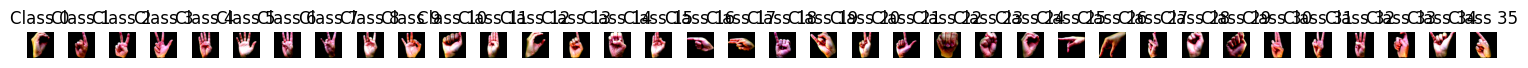

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 132MB/s]



Model architecture:
PretrainedASLClassifierResNet18(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64,

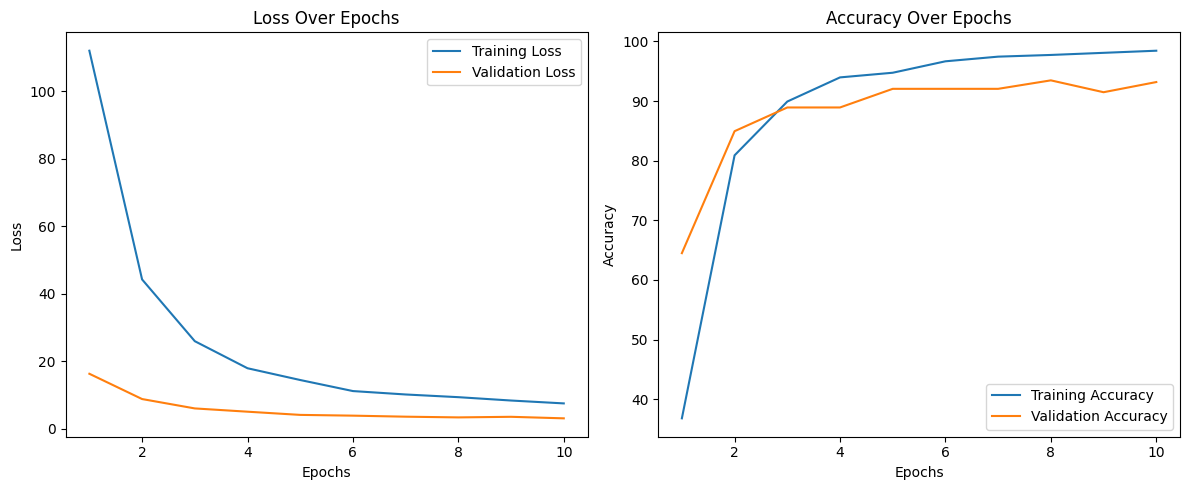

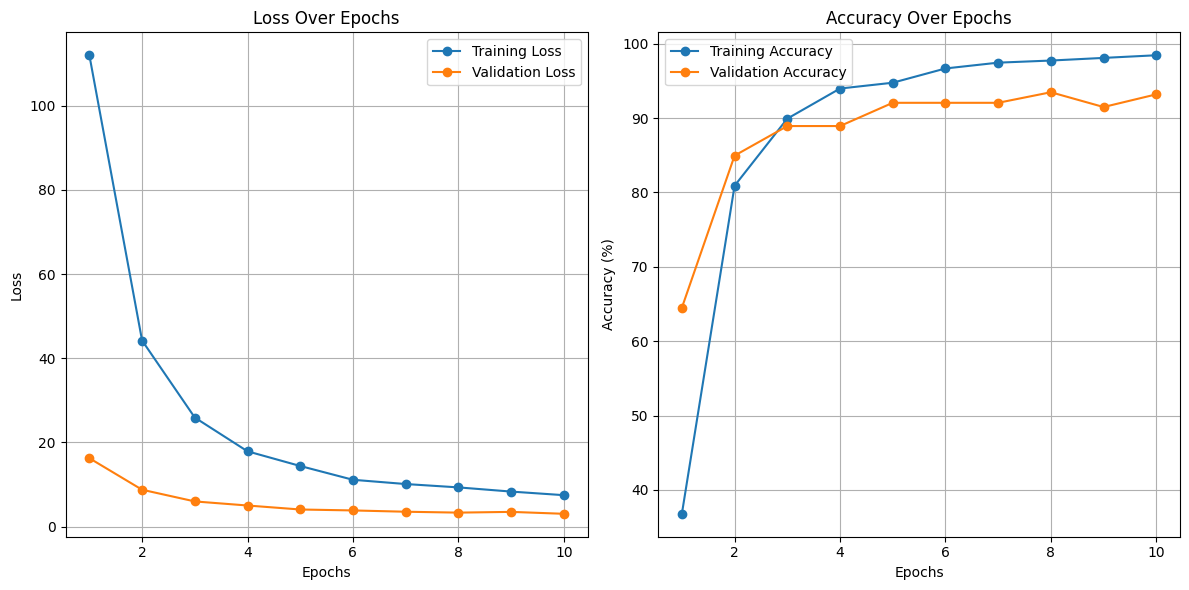


Bias-Variance Analysis:
Model is likely balanced, with comparable training and validation accuracies.


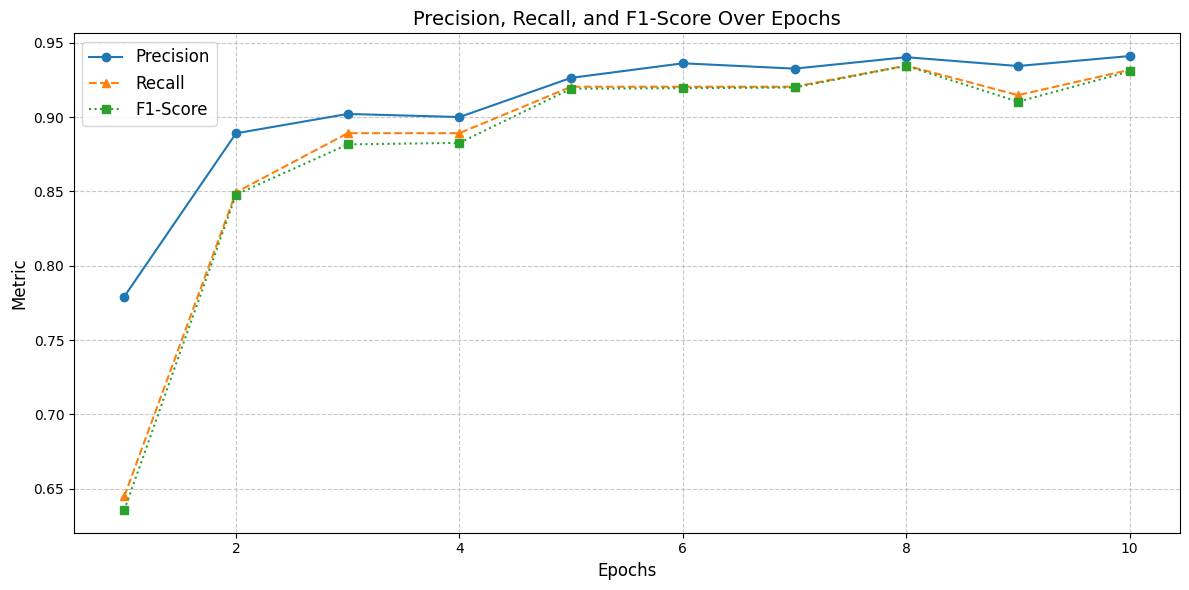


Final Classification Metrics:
Precision (Last Epoch): 0.94
Recall (Last Epoch): 0.93
F1-Score (Last Epoch): 0.93


<Figure size 1000x800 with 0 Axes>

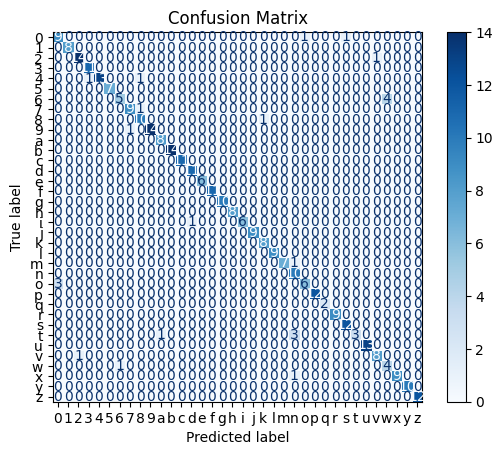


=== Fold 2/5 ===


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training Fold 2...
Epoch 1/10 -> Train Loss: 111.0310, Train Acc: 39.99%, Valid Loss: 15.9338, Valid Acc: 70.74%, Precision: 0.76, Recall: 0.71, F1-Score: 0.66
Epoch 2/10 -> Train Loss: 44.9123, Train Acc: 80.26%, Valid Loss: 9.2058, Valid Acc: 82.10%, Precision: 0.88, Recall: 0.82, F1-Score: 0.80
Epoch 3/10 -> Train Loss: 26.4857, Train Acc: 90.13%, Valid Loss: 6.7808, Valid Acc: 88.35%, Precision: 0.90, Recall: 0.88, F1-Score: 0.88
Epoch 4/10 -> Train Loss: 18.2695, Train Acc: 93.82%, Valid Loss: 5.4886, Valid Acc: 87.78%, Precision: 0.90, Recall: 0.88, F1-Score: 0.87
Epoch 5/10 -> Train Loss: 14.5845, Train Acc: 95.03%, Valid Loss: 4.6470, Valid Acc: 90.06%, Precision: 0.91, Recall: 0.90, F1-Score: 0.90
Epoch 6/10 -> Train Loss: 11.1862, Train Acc: 97.09%, Valid Loss: 4.2162, Valid Acc: 91.19%, Precision: 0.92, Recall: 0.91, F1-Score: 0.91
Epoch 7/10 -> Train Loss: 10.1281, Train Acc: 97.37%, Valid Loss: 4.0331, Valid Acc: 92.61%, Precision: 0.94, Recall: 0.93, F1-Score: 0.92
Epoch 

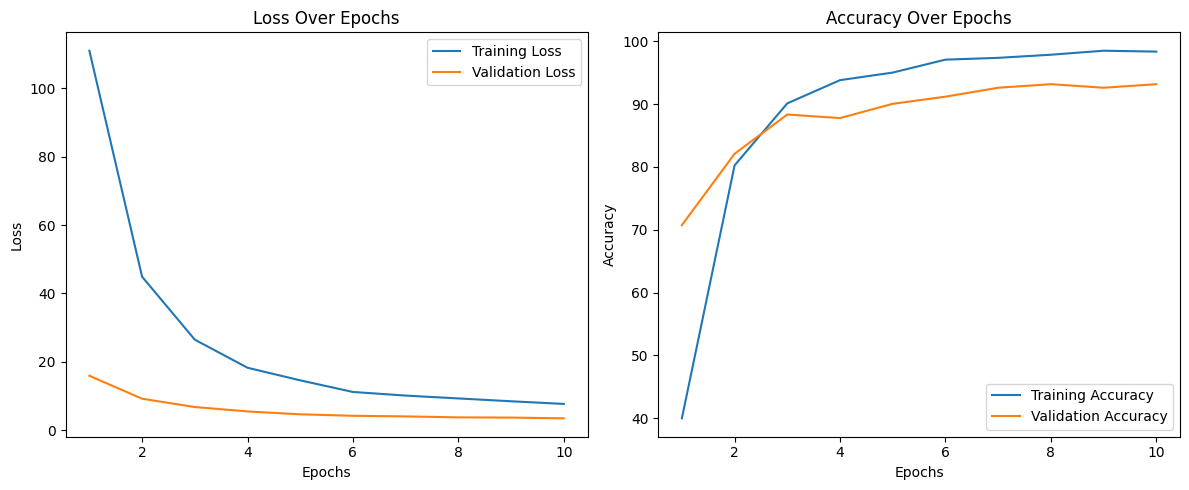

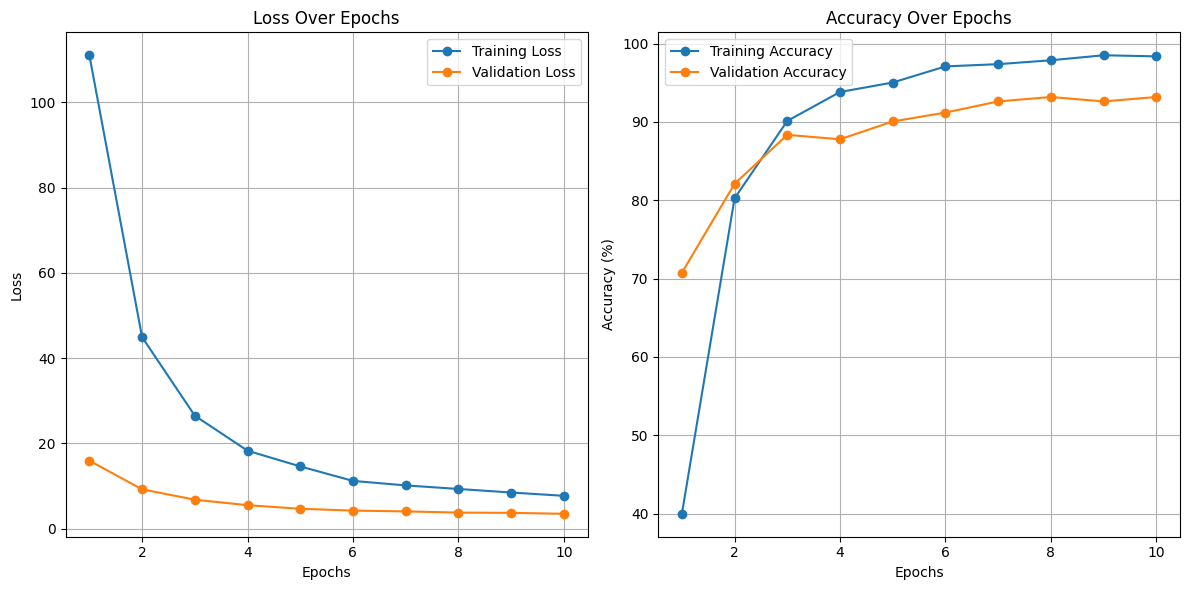


Bias-Variance Analysis:
Model is likely balanced, with comparable training and validation accuracies.


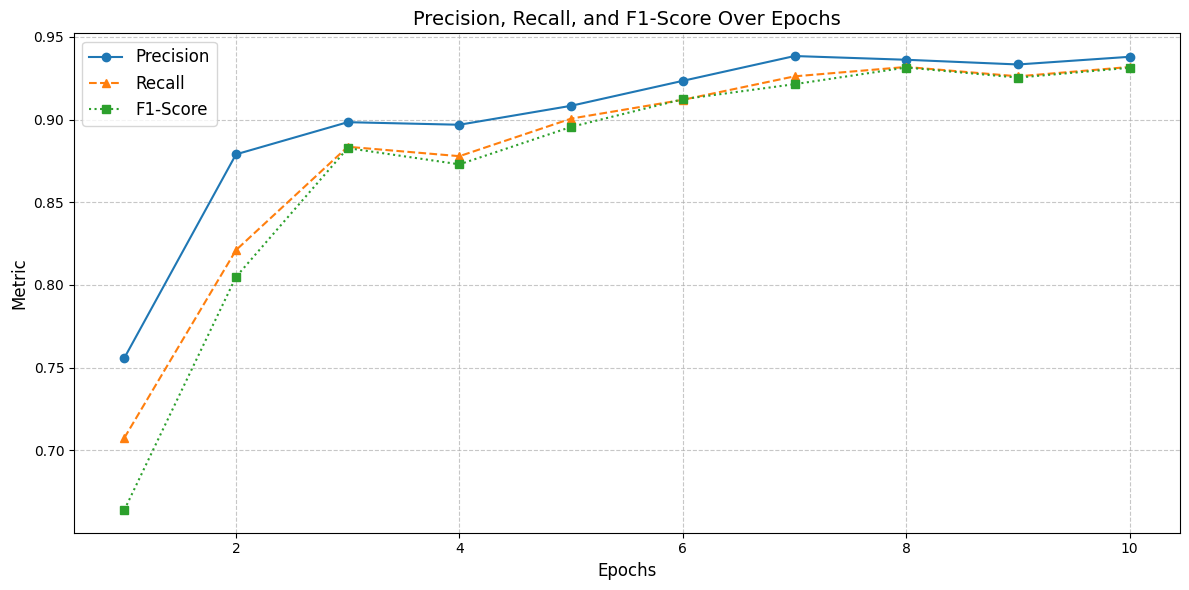


Final Classification Metrics:
Precision (Last Epoch): 0.94
Recall (Last Epoch): 0.93
F1-Score (Last Epoch): 0.93


<Figure size 1000x800 with 0 Axes>

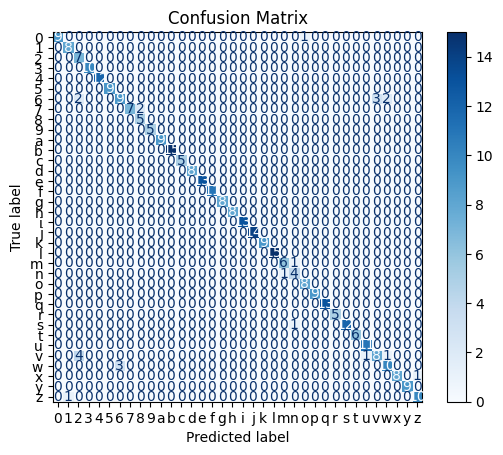


=== Fold 3/5 ===


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training Fold 3...
Epoch 1/10 -> Train Loss: 111.9448, Train Acc: 37.93%, Valid Loss: 15.8959, Valid Acc: 67.61%, Precision: 0.72, Recall: 0.68, F1-Score: 0.64
Epoch 2/10 -> Train Loss: 46.0756, Train Acc: 78.91%, Valid Loss: 8.5234, Valid Acc: 82.67%, Precision: 0.86, Recall: 0.83, F1-Score: 0.82
Epoch 3/10 -> Train Loss: 26.5257, Train Acc: 90.13%, Valid Loss: 6.3826, Valid Acc: 83.52%, Precision: 0.89, Recall: 0.84, F1-Score: 0.82
Epoch 4/10 -> Train Loss: 18.7254, Train Acc: 93.61%, Valid Loss: 4.9796, Valid Acc: 91.19%, Precision: 0.93, Recall: 0.91, F1-Score: 0.91
Epoch 5/10 -> Train Loss: 14.8139, Train Acc: 94.82%, Valid Loss: 4.2668, Valid Acc: 91.48%, Precision: 0.94, Recall: 0.91, F1-Score: 0.91
Epoch 6/10 -> Train Loss: 10.9501, Train Acc: 97.66%, Valid Loss: 3.8169, Valid Acc: 93.47%, Precision: 0.95, Recall: 0.93, F1-Score: 0.93
Epoch 7/10 -> Train Loss: 9.9475, Train Acc: 97.80%, Valid Loss: 3.5940, Valid Acc: 93.47%, Precision: 0.94, Recall: 0.93, F1-Score: 0.93
Epoch 8

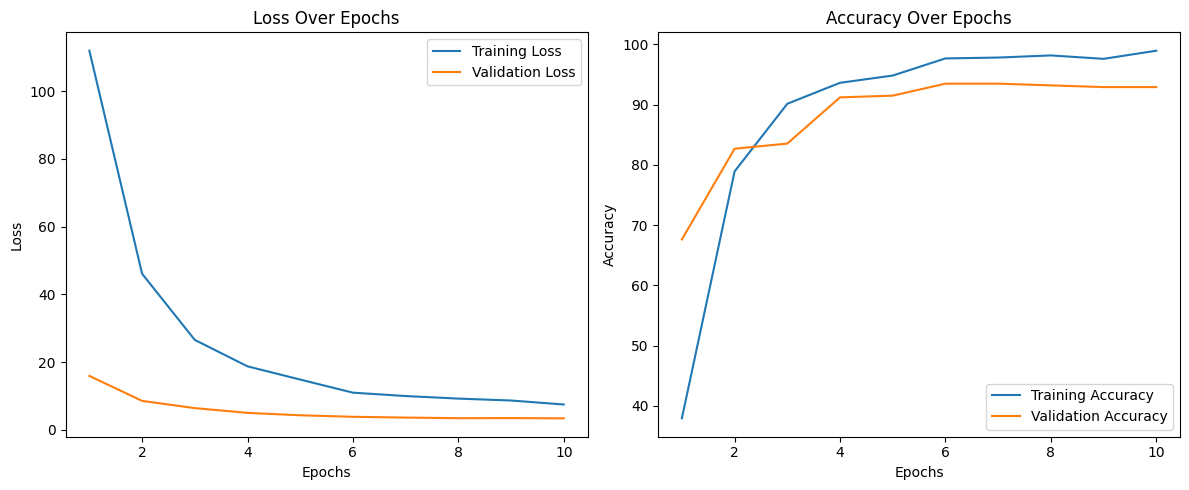

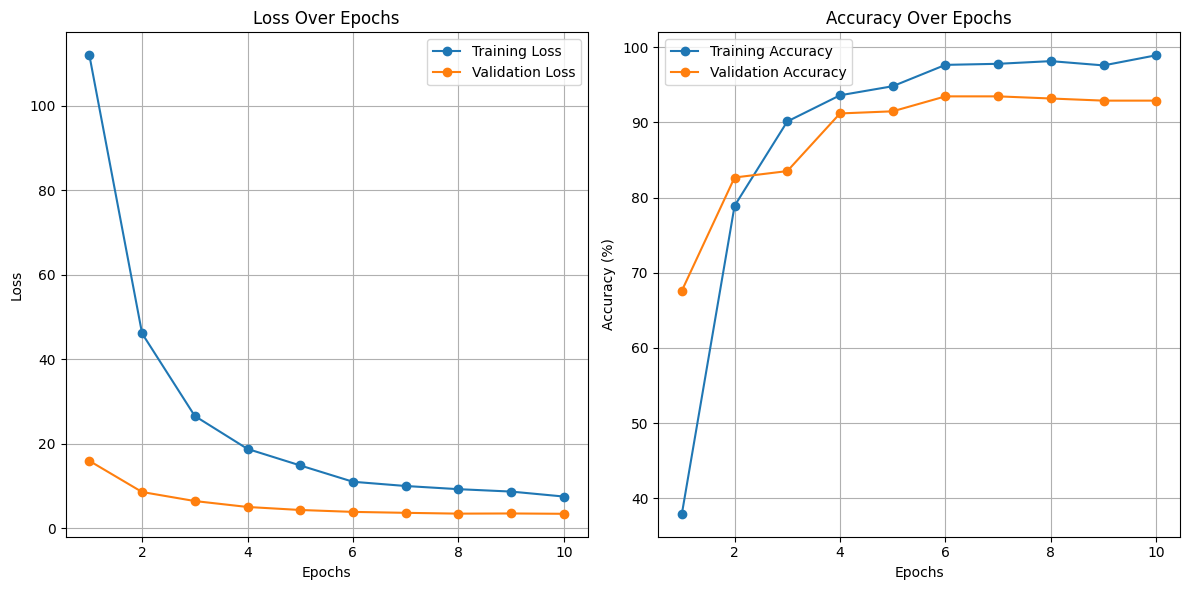


Bias-Variance Analysis:
Model is likely balanced, with comparable training and validation accuracies.


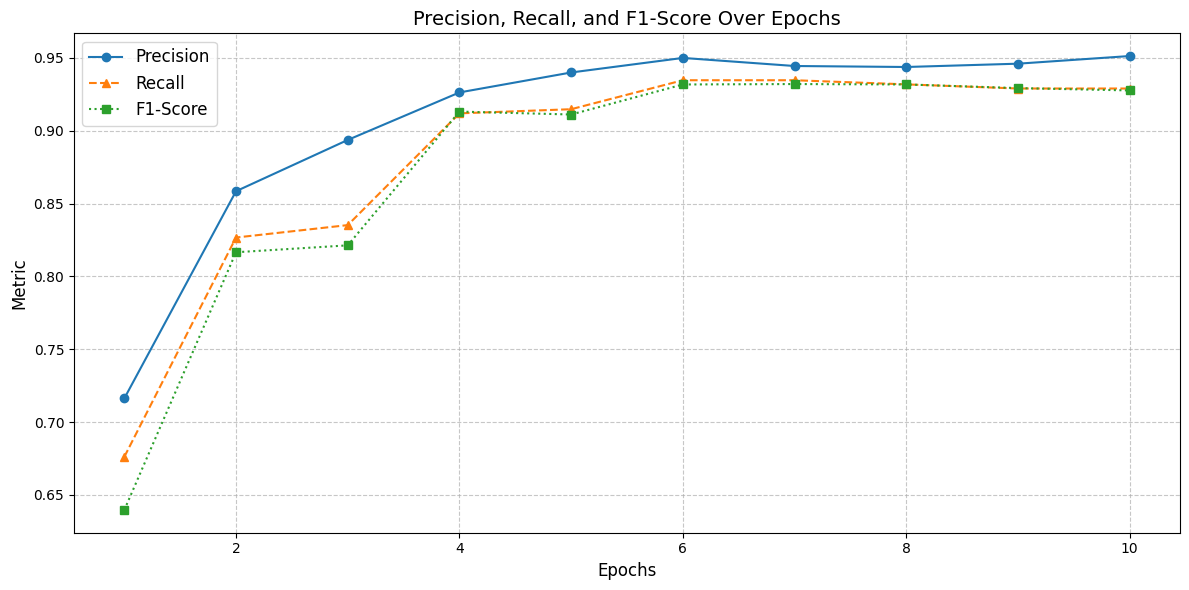


Final Classification Metrics:
Precision (Last Epoch): 0.95
Recall (Last Epoch): 0.93
F1-Score (Last Epoch): 0.93


<Figure size 1000x800 with 0 Axes>

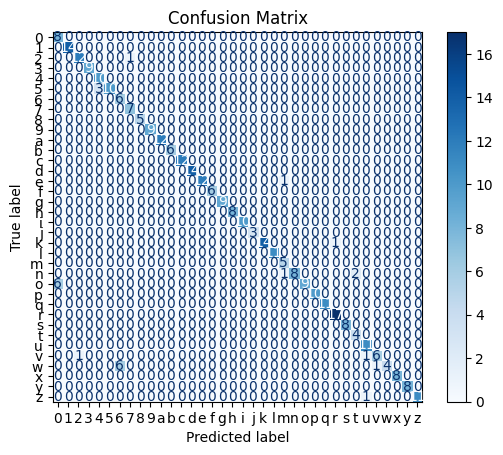


=== Fold 4/5 ===


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training Fold 4...
Epoch 1/10 -> Train Loss: 113.3818, Train Acc: 37.50%, Valid Loss: 15.8599, Valid Acc: 74.15%, Precision: 0.81, Recall: 0.74, F1-Score: 0.72
Epoch 2/10 -> Train Loss: 44.9835, Train Acc: 80.68%, Valid Loss: 8.7966, Valid Acc: 84.94%, Precision: 0.87, Recall: 0.85, F1-Score: 0.84
Epoch 3/10 -> Train Loss: 26.4063, Train Acc: 90.06%, Valid Loss: 6.0461, Valid Acc: 89.77%, Precision: 0.91, Recall: 0.90, F1-Score: 0.90
Epoch 4/10 -> Train Loss: 18.7762, Train Acc: 93.32%, Valid Loss: 5.1819, Valid Acc: 90.06%, Precision: 0.92, Recall: 0.90, F1-Score: 0.90
Epoch 5/10 -> Train Loss: 14.5828, Train Acc: 94.39%, Valid Loss: 4.0776, Valid Acc: 90.62%, Precision: 0.92, Recall: 0.91, F1-Score: 0.91
Epoch 6/10 -> Train Loss: 11.4901, Train Acc: 96.80%, Valid Loss: 3.8488, Valid Acc: 92.33%, Precision: 0.93, Recall: 0.92, F1-Score: 0.92
Epoch 7/10 -> Train Loss: 10.0392, Train Acc: 97.44%, Valid Loss: 3.7693, Valid Acc: 92.90%, Precision: 0.94, Recall: 0.93, F1-Score: 0.93
Epoch 

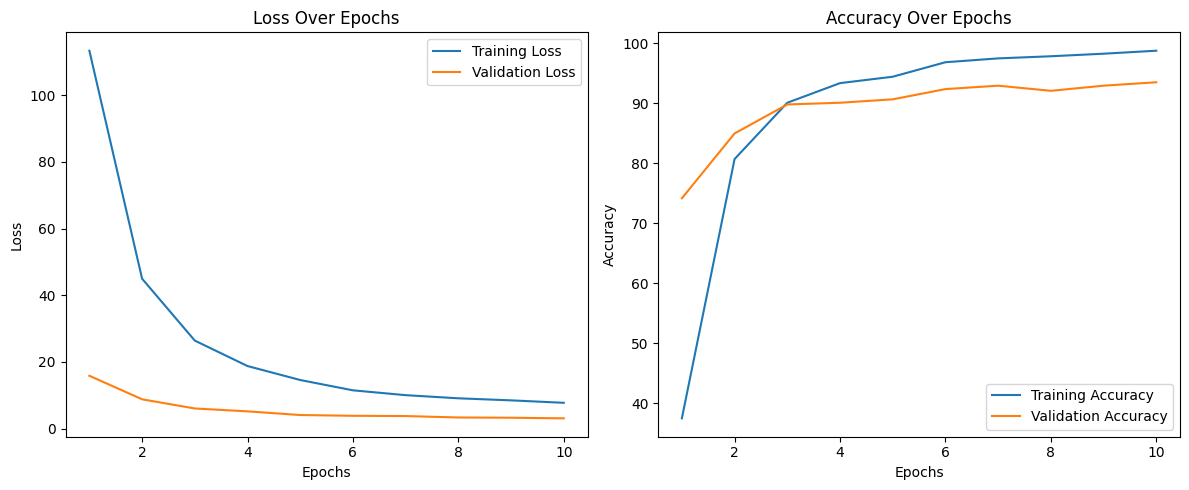

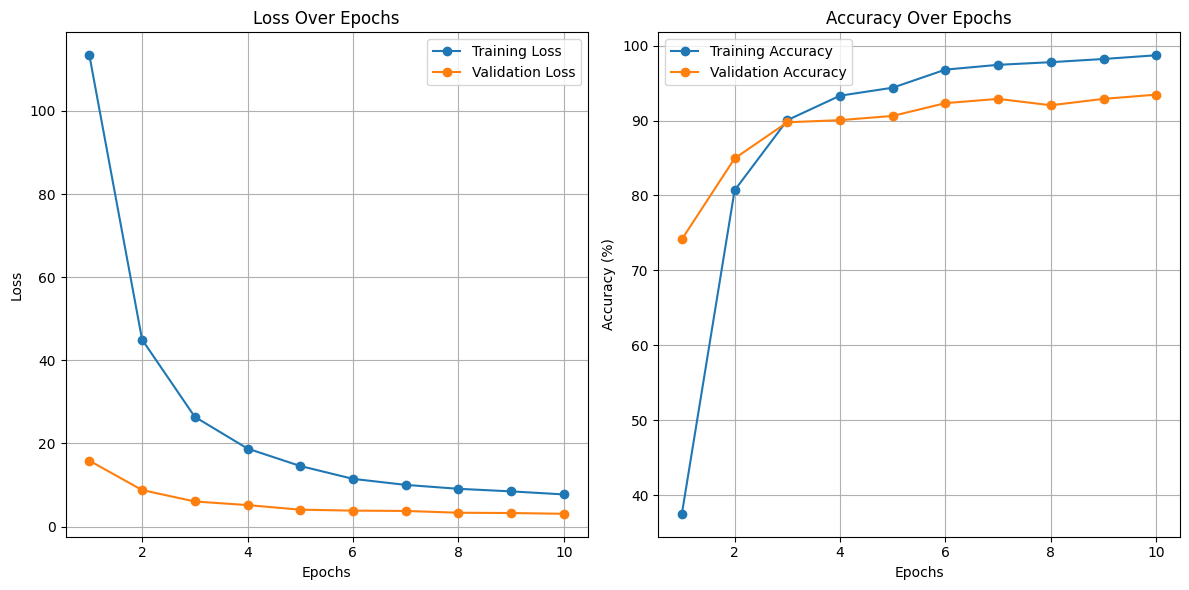


Bias-Variance Analysis:
Model is likely balanced, with comparable training and validation accuracies.


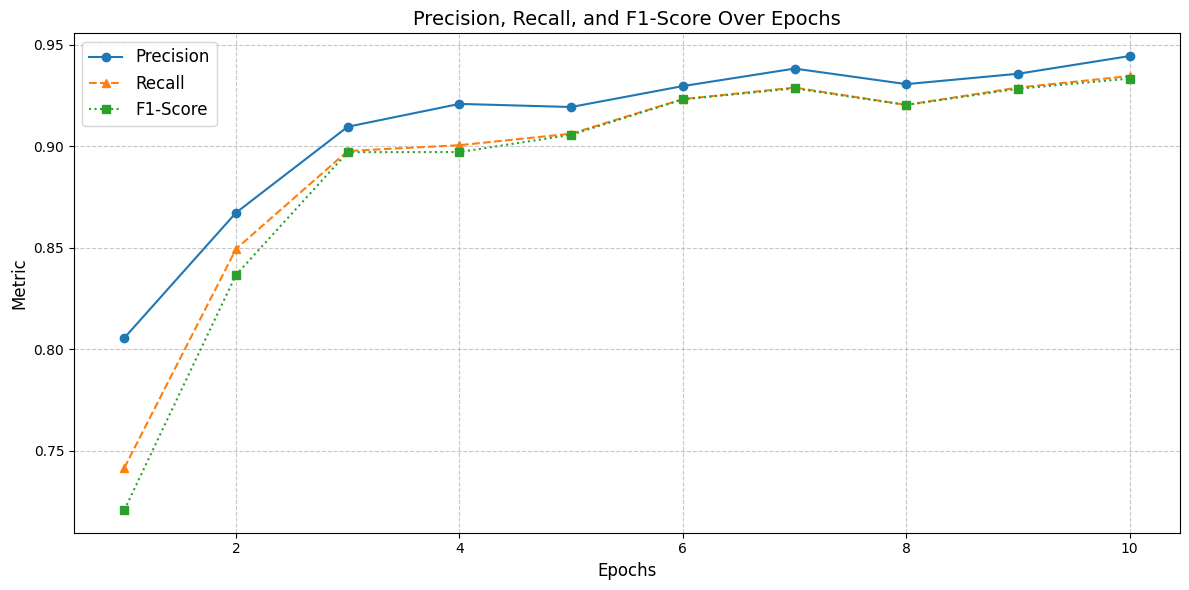


Final Classification Metrics:
Precision (Last Epoch): 0.94
Recall (Last Epoch): 0.93
F1-Score (Last Epoch): 0.93


<Figure size 1000x800 with 0 Axes>

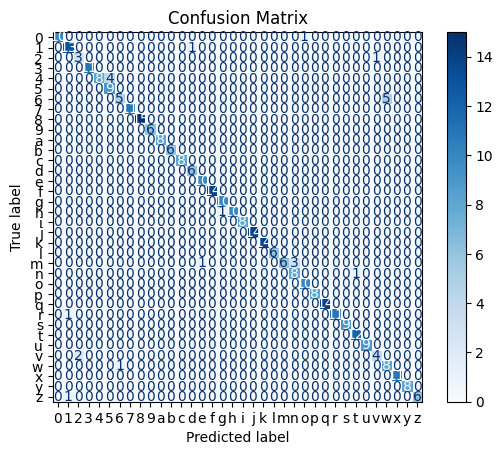


=== Fold 5/5 ===


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training Fold 5...
Epoch 1/10 -> Train Loss: 111.8851, Train Acc: 40.48%, Valid Loss: 16.1706, Valid Acc: 68.75%, Precision: 0.75, Recall: 0.69, F1-Score: 0.66
Epoch 2/10 -> Train Loss: 43.1393, Train Acc: 82.60%, Valid Loss: 9.8240, Valid Acc: 78.12%, Precision: 0.84, Recall: 0.78, F1-Score: 0.77
Epoch 3/10 -> Train Loss: 26.1850, Train Acc: 88.99%, Valid Loss: 6.6977, Valid Acc: 86.93%, Precision: 0.90, Recall: 0.87, F1-Score: 0.87
Epoch 4/10 -> Train Loss: 18.2827, Train Acc: 92.97%, Valid Loss: 5.8100, Valid Acc: 84.66%, Precision: 0.89, Recall: 0.85, F1-Score: 0.84
Epoch 5/10 -> Train Loss: 14.2625, Train Acc: 95.60%, Valid Loss: 4.4625, Valid Acc: 91.19%, Precision: 0.93, Recall: 0.91, F1-Score: 0.91
Epoch 6/10 -> Train Loss: 11.4582, Train Acc: 96.09%, Valid Loss: 4.1361, Valid Acc: 92.90%, Precision: 0.94, Recall: 0.93, F1-Score: 0.93
Epoch 7/10 -> Train Loss: 9.9193, Train Acc: 96.95%, Valid Loss: 3.9445, Valid Acc: 91.76%, Precision: 0.93, Recall: 0.92, F1-Score: 0.92
Epoch 8

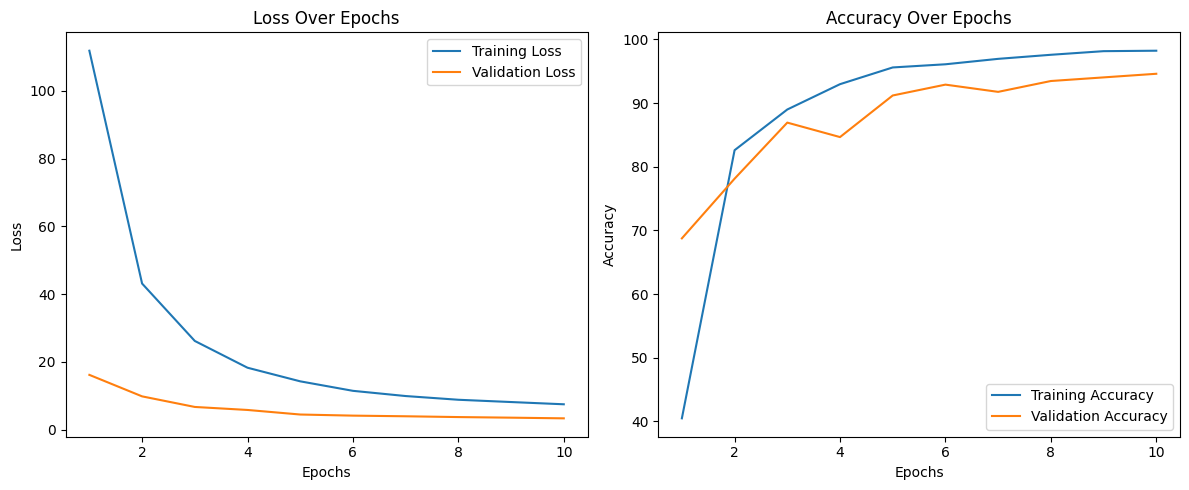

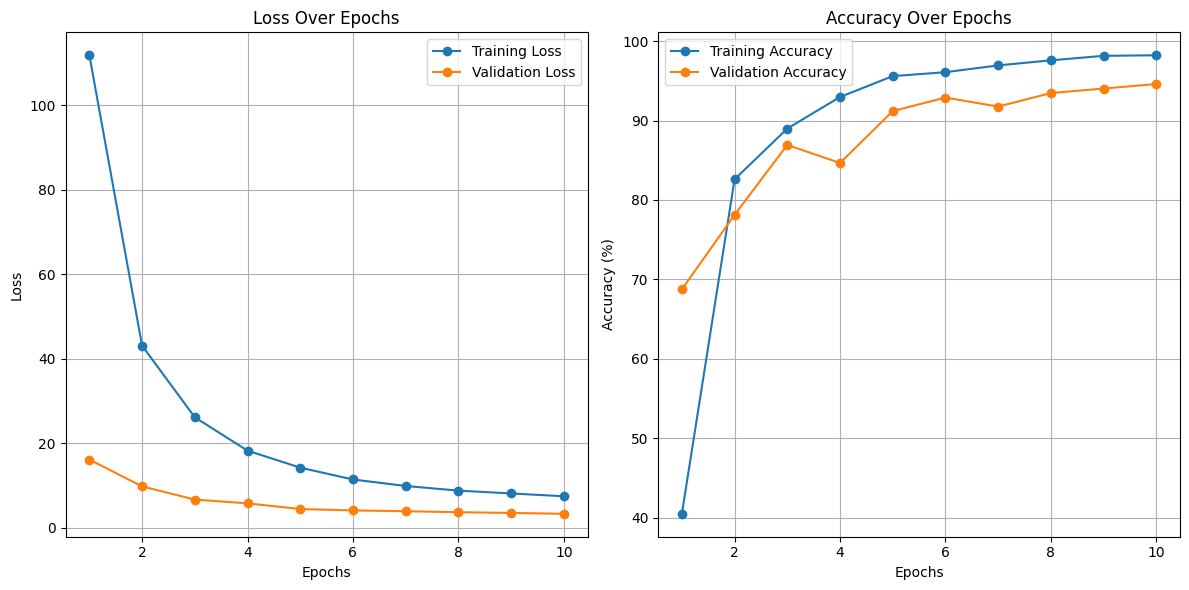


Bias-Variance Analysis:
Model is likely balanced, with comparable training and validation accuracies.


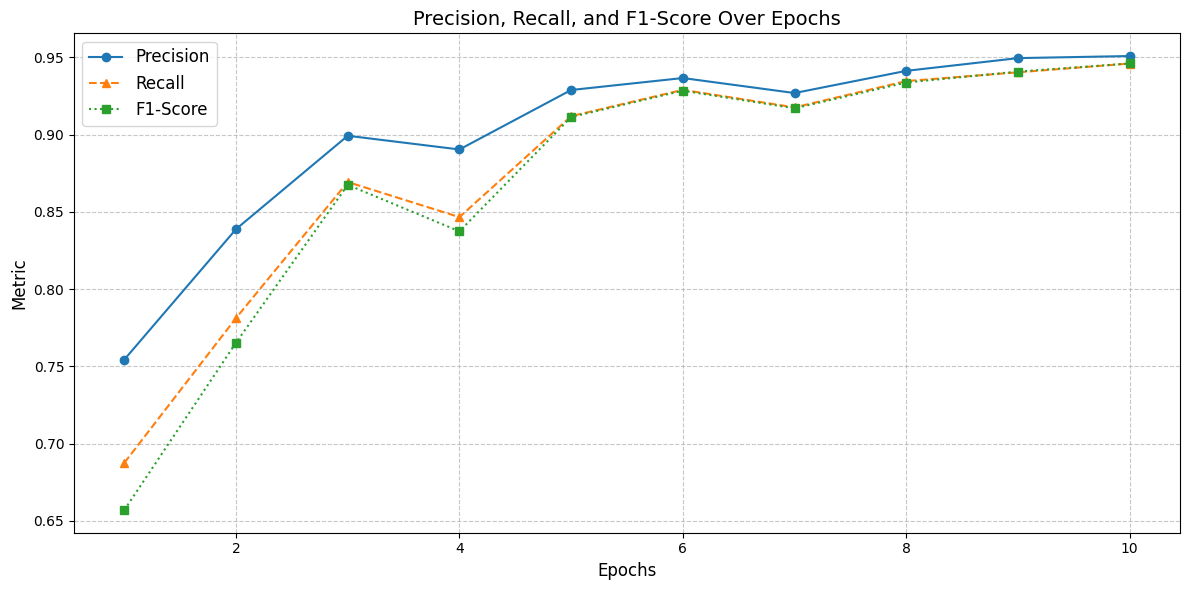


Final Classification Metrics:
Precision (Last Epoch): 0.95
Recall (Last Epoch): 0.95
F1-Score (Last Epoch): 0.95


<Figure size 1000x800 with 0 Axes>

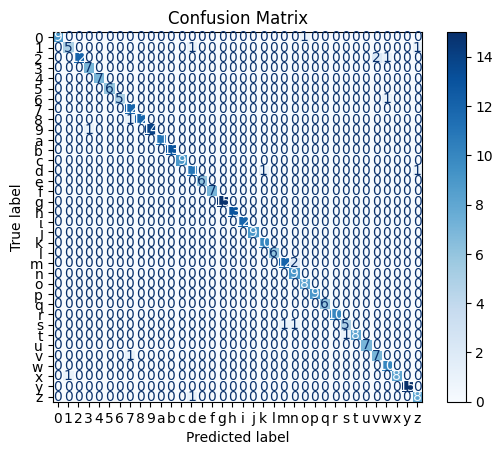


=== Cross-Validation Results ===
Fold 1: Validation Accuracy = 93.18%
Fold 2: Validation Accuracy = 93.18%
Fold 3: Validation Accuracy = 92.90%
Fold 4: Validation Accuracy = 93.47%
Fold 5: Validation Accuracy = 94.60%
Best Validation Accuracy: 94.60%
Model saved to asl_classifier_best_pretrained.pth
Best model from cross-validation saved to asl_classifier_best_pretrained.pth


In [19]:
# Main Workflow for Pretrained Model
def main_pretrained():
    # Path to the Kaggle authentication JSON file
    kaggle_json_path = "kaggle.json"

    # Kaggle dataset identifier
    dataset_id = "ayuraj/asl-dataset"

    # Directory where the dataset will be stored after extraction
    output_dir = "./asl_dataset"

    # Path to the directory containing the actual dataset files
    data_dir = os.path.join(output_dir, "asl_dataset")

    # Download the dataset from Kaggle and extract it to the specified directory
    download_and_extract_dataset(dataset_id, kaggle_json_path, output_dir)

    # Data transformations for training data
    # Includes resizing images, random augmentations (rotation, flip, etc.), normalization, and conversion to tensors
    # **Updated for pretrained model**: Resize to 224x224 for ResNet18, normalize using ImageNet stats
    train_transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize images to 224x224 pixels for ResNet18
        transforms.RandomRotation(15),  # Randomly rotate images by up to 15 degrees
        transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Randomly shift images slightly
        transforms.ToTensor(),  # Convert images to PyTorch tensors
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ImageNet
    ])

    # Data transformations for test data
    # **Updated for pretrained model**: Similar resizing and normalization changes as above
    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
        transforms.ToTensor(),  # Convert images to PyTorch tensors
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ImageNet
    ])

    # Define the mapping of classes (0-9 for digits and a-z for letters)
    # Create a list combining strings for digits (0-9) and letters (a-z)
    full_classes = list(map(str, range(10))) + list(map(chr, range(ord('a'), ord('z') + 1)))

    # Dynamically limit the subset of classes to use for the dataset
    SUBSET_END_INDEX = 35  # 0-9 remain as 0-9, and a-z corresponds to 10-35
    class_subset = full_classes[:SUBSET_END_INDEX + 1]

    # Use the dataset preparation function to split data into train, validation, and test sets
    # Applies the specified transformations to training and testing datasets
    train_dataset, valid_dataset, test_dataset = prepare_pretrained_datasets(
        data_dir, class_subset, train_transform, test_transform
    )

    # Define the batch size for training and validation loaders
    batch_size = 32

    # Create DataLoader for training and validation data
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    # Visualize dataset: One sample per class from the training dataset
    # **Same functionality as the scratch model**
    print("\nVisualizing dataset samples:")
    visualize_pretrained_classes(train_loader, class_subset)

    # Model setup
    # Calculate the total number of classes in the subset
    num_classes = len(class_subset)

    # Check if GPU (CUDA) is available and set the computation device accordingly
    # **Same as scratch model**
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Initialize the pretrained ResNet18 model and modify it for ASL classification
    # **Significant change from scratch model**: Load ResNet18 and replace its FC layer
    model = PretrainedASLClassifierResNet18(num_classes=num_classes).to(device)

    # Display the model architecture
    print("\nModel architecture:")
    print(model)

    # Use the torchsummary package to print a detailed summary of the model
    # **Updated for pretrained model**: Input size adjusted to (3, 224, 224) for ResNet18
    summary(model, (3, 224, 224))  # Input size for ResNet18

    # Define the loss function (CrossEntropyLoss for multi-class classification)
    # **Same as scratch model**
    criterion = nn.CrossEntropyLoss()

    # Define the optimizer (Adam optimizer with learning rate and weight decay)
    # **Same as scratch model**: Optimizer and its parameters are consistent for direct comparison
    optimizer = optim.Adam(model.parameters(), lr=0.002, weight_decay=1e-4)

    # Define the learning rate scheduler (reduce learning rate every 5 epochs by a factor of 0.5)
    # **Same as scratch model**
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    # Flag to toggle cross-validation
    use_cross_validation = True  # Set to True to perform k-fold cross-validation

    if use_cross_validation:
        # Cross-validation hyperparameters
        hyperparams = {
            'batch_size': batch_size,
            'optimizer': {'lr': 0.002, 'weight_decay': 1e-4},
            'scheduler': {'step_size': 5, 'gamma': 0.5}
        }

        # Perform k-fold cross-validation using the cross_validate_model function
        print("\nStarting Cross-Validation...")
        # **Updated model class initialization for pretrained**
        best_model_state, best_accuracy, fold_results = cross_validate_model(
            train_dataset,
            model=PretrainedASLClassifierResNet18(num_classes=num_classes, freeze_layers=True),  # Pass model instance
            criterion=criterion,
            optimizer_class=optim.Adam,
            scheduler_class=torch.optim.lr_scheduler.StepLR,
            hyperparams=hyperparams,
            k=5,
            epochs=10,
            device=device
        )


        # Save the best model from cross-validation
        model_save_path = "asl_classifier_best_pretrained.pth"
        save_model(best_model_state, model_save_path)
        print(f"Best model from cross-validation saved to {model_save_path}")

    else:
        # Perform standard training
        print("\nTraining the model...")
        train_losses, valid_losses, train_accuracies, valid_accuracies, precisions, recalls, f1_scores, conf_matrix = train_fine_tuned_model(
            model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs=10, device=device
        )

        # Visualize training and validation metrics
        # **Same as scratch model**
        visualize_training_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies)

        # Analyze bias and variance
        # **Same as scratch model**
        analyze_bias_variance(train_losses, valid_losses, train_accuracies, valid_accuracies)

        # Visualize precision, recall, and F1-score
        # **Same as scratch model**
        visualize_classification_metrics(precisions, recalls, f1_scores)

        # Visualize the confusion matrix
        # **Same as scratch model**
        visualize_confusion_matrix(conf_matrix, class_subset)


        # Save the trained model to a file
        model_save_path = "asl_classifier_pretrained.pth"
        save_model(model.state_dict(), model_save_path)
        print(f"Model saved to {model_save_path}")

if __name__ == "__main__":
    main_pretrained()


### **Fine-Tuning Options**

---

#### **Option 1: Fine-Tuning Within Each Fold**
- **Description**: Fine-tuning occurs during **each fold** of the 5-fold cross-validation process.
- **Workflow**:
   - Train only the **fully connected (FC) layer** for the first few epochs.
   - Gradually **unfreeze layers** (starting with `layer4` and moving backward) within each fold.
- **Advantages**:
   - Fine-tuning is integrated into cross-validation, providing fold-specific fine-tuned results.
   - Reduces bias by fine-tuning on each fold independently.
- **Disadvantages**:
   - Computationally expensive since multiple models (one per fold) are fine-tuned.
   - Risk of overfitting if the dataset is small.

---

#### **Option 2: Fine-Tuning After Cross-Validation**
- **Description**: The entire 5-fold cross-validation process runs **without fine-tuning**. Fine-tuning is applied **after** the best-performing model is selected.
- **Workflow**:
   1. Run 5-fold cross-validation with the pretrained model's layers frozen and only the **FC layer** trained.
   2. Select the **best-performing model** (highest validation accuracy).
   3. Combine all training data, gradually **unfreeze layers**, and fine-tune the model.
   4. Evaluate the fine-tuned model on the test set.
- **Advantages**:
   - Computationally efficient since fine-tuning happens **once** after cross-validation.
   - Final model benefits from training on all available data.
- **Disadvantages**:
   - Fold-specific fine-tuned models are not obtained, but this is often unnecessary for final benchmarking.

---

### **Why We Are Choosing Option 2**

We are choosing **Option 2 (Fine-Tuning After Cross-Validation)** for the following reasons:
1. **Efficiency**: Fine-tuning only once after cross-validation reduces computational costs significantly.
2. **Benchmarking Simplicity**: We aim to compare the scratch model and pretrained model systematically. Fine-tuning after cross-validation ensures a clear, direct comparison.
3. **Maximized Training Data**: Fine-tuning the best-performing model on all available training data will result in a **stronger final model**.

By focusing on fine-tuning **after cross-validation**, we streamline the process while maintaining best practices for model evaluation and comparison.

---


## Objective
Implement a gradual fine-tuning strategy for the pretrained ResNet18 model to improve performance while avoiding overfitting, particularly on a small dataset.

---

## Fine-Tuning Approach

### 1. **Layer-by-Layer Gradual Unfreezing**
   - **Purpose**: Gradually unfreeze layers of the pretrained model, starting from the topmost layers (`layer4`) and moving backward.
   - **Reason**: Higher layers contain task-specific features, while lower layers extract more general features. Fine-tuning the higher layers first provides the most immediate improvements for small datasets.

### 2. **Validation Performance Monitoring**
   - Track **validation loss** as the primary metric to evaluate each fine-tuning stage.
   - If the validation loss improves after unfreezing a layer, proceed to the next layer.
   - If the validation loss worsens, **revert to the previously saved best model** and stop further unfreezing.

### 3. **Early Stopping Mechanism**
   - The fine-tuning process stops automatically when validation performance (loss or accuracy) degrades after unfreezing a layer.
   - This prevents overfitting on the small dataset.

---

## Fine-Tuning Workflow

1. Start with the pretrained model where all layers are frozen except the fully connected (FC) layer.
2. Gradually unfreeze layers (`layer4`, `layer3`) while fine-tuning the model.
3. Monitor validation performance:
   - If validation loss improves → Proceed to the next layer.
   - If validation loss worsens → Revert to the previous best model and stop unfreezing.
4. Save the final best-performing model for deployment.

---

## Key Benefits
- **Improved Generalization**: Gradual unfreezing prevents overfitting on small datasets.
- **Systematic Monitoring**: Validation metrics guide the fine-tuning process to avoid performance degradation.
- **Automated Best Model Saving**: Ensures the best-performing model is preserved for final use.

---

## Final Notes
The approach combines:
- **Best practices for fine-tuning pretrained models**.
- **Early stopping** to avoid overfitting.
- **Model state saving and restoration** to ensure robustness.

This strategy provides a reliable and efficient way to fine-tune the pretrained ResNet18 model for ASL classification.



Starting Fine-Tuning Workflow...
All class directories are present.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-15-2047eb8c0ca8>:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detai

Model loaded from asl_classifier_best_pretrained.pth

Model loaded for fine-tuning:
PretrainedASLClassifierResNet18(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1,

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Epoch 1/5 -> Train Loss: 7.4965, Train Acc: 96.93%, Valid Loss: 0.8266, Valid Acc: 97.88%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98
Epoch 2/5 -> Train Loss: 0.8349, Train Acc: 99.83%, Valid Loss: 0.7196, Valid Acc: 98.41%, Precision: 0.99, Recall: 0.98, F1-Score: 0.98
Epoch 3/5 -> Train Loss: 0.4349, Train Acc: 99.89%, Valid Loss: 0.4371, Valid Acc: 99.47%, Precision: 1.00, Recall: 0.99, F1-Score: 0.99
Epoch 4/5 -> Train Loss: 0.2245, Train Acc: 100.00%, Valid Loss: 0.3022, Valid Acc: 99.73%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Epoch 5/5 -> Train Loss: 0.1443, Train Acc: 100.00%, Valid Loss: 0.2861, Valid Acc: 99.20%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99

Visualizing metrics for this fine-tuning stage:


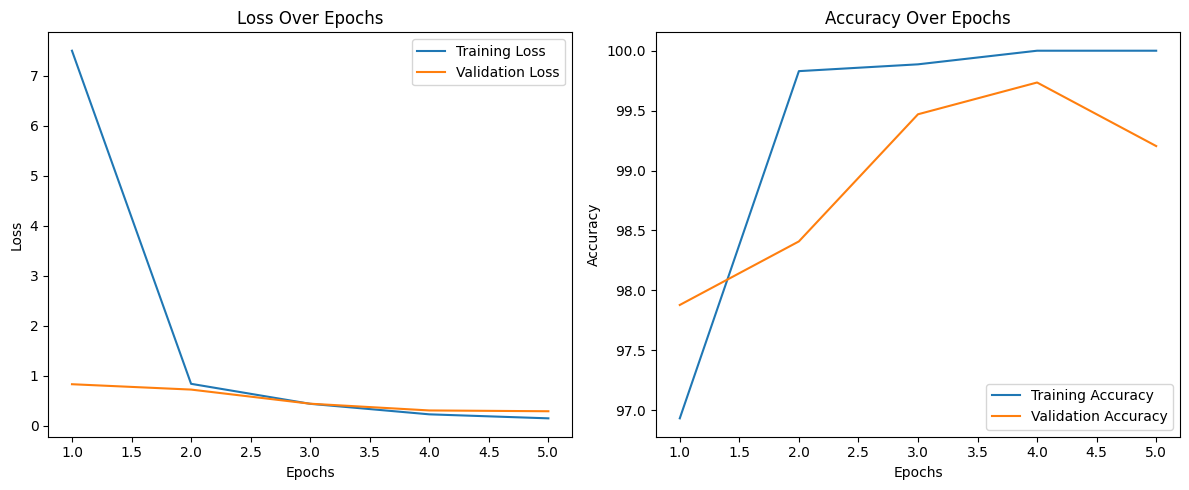

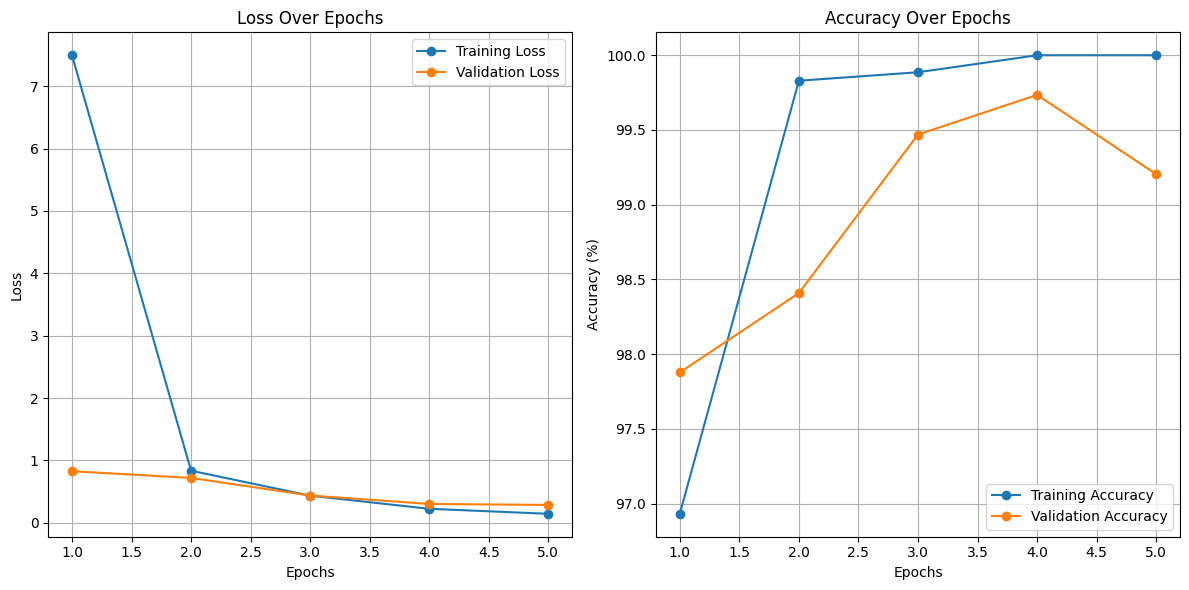


Bias-Variance Analysis:
Model is likely balanced, with comparable training and validation accuracies.


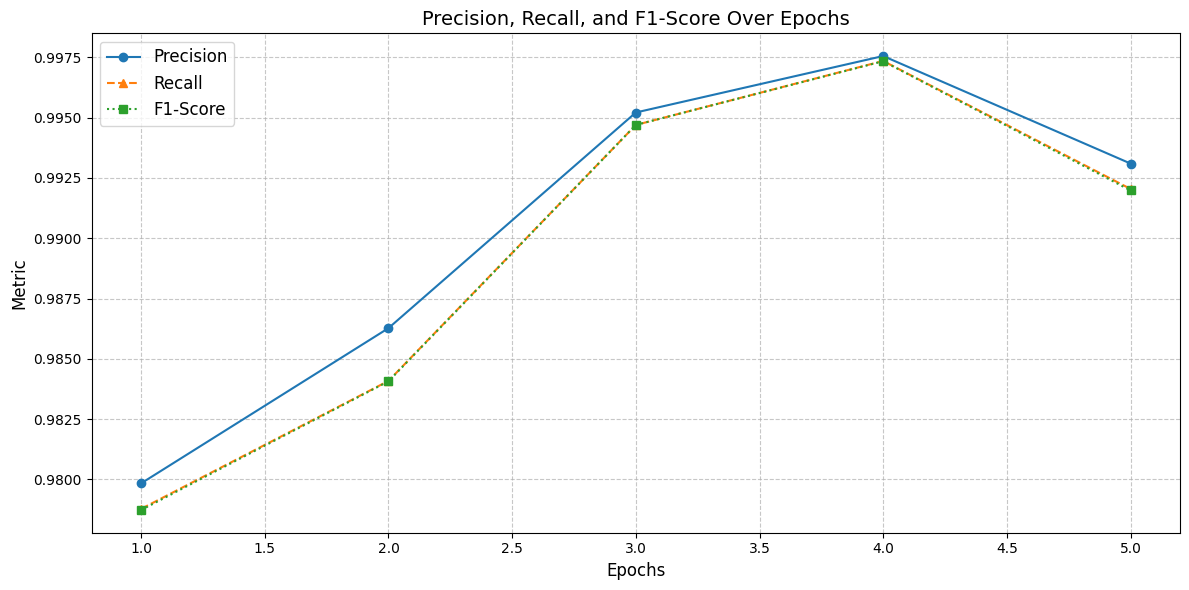


Final Classification Metrics:
Precision (Last Epoch): 0.99
Recall (Last Epoch): 0.99
F1-Score (Last Epoch): 0.99


<Figure size 1000x800 with 0 Axes>

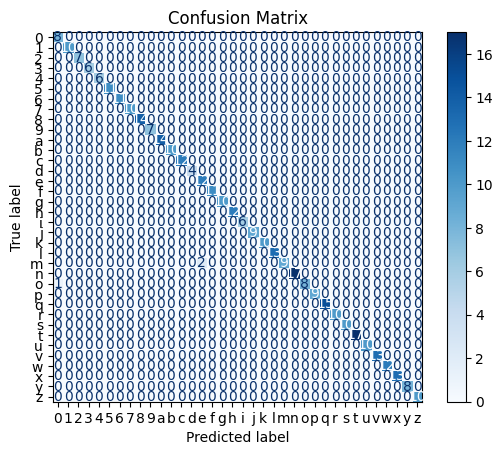

Model saved to asl_classifier_fine_tuned_layer4.pth
Model fine-tuned with layer4 unfrozen saved to asl_classifier_fine_tuned_layer4.pth
Best model updated with layer4 unfrozen.

Fine-tuning with layer3 unfrozen...
Epoch 1/5 -> Train Loss: 1.1569, Train Acc: 99.55%, Valid Loss: 1.0613, Valid Acc: 97.35%, Precision: 0.98, Recall: 0.97, F1-Score: 0.97
Epoch 2/5 -> Train Loss: 0.8237, Train Acc: 99.72%, Valid Loss: 0.4677, Valid Acc: 98.41%, Precision: 0.99, Recall: 0.98, F1-Score: 0.98
Epoch 3/5 -> Train Loss: 0.5225, Train Acc: 99.72%, Valid Loss: 0.3034, Valid Acc: 99.20%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99
Epoch 4/5 -> Train Loss: 0.2584, Train Acc: 99.89%, Valid Loss: 0.6085, Valid Acc: 98.41%, Precision: 0.99, Recall: 0.98, F1-Score: 0.98
Epoch 5/5 -> Train Loss: 0.1333, Train Acc: 99.94%, Valid Loss: 0.3343, Valid Acc: 98.41%, Precision: 0.99, Recall: 0.98, F1-Score: 0.98

Visualizing metrics for this fine-tuning stage:


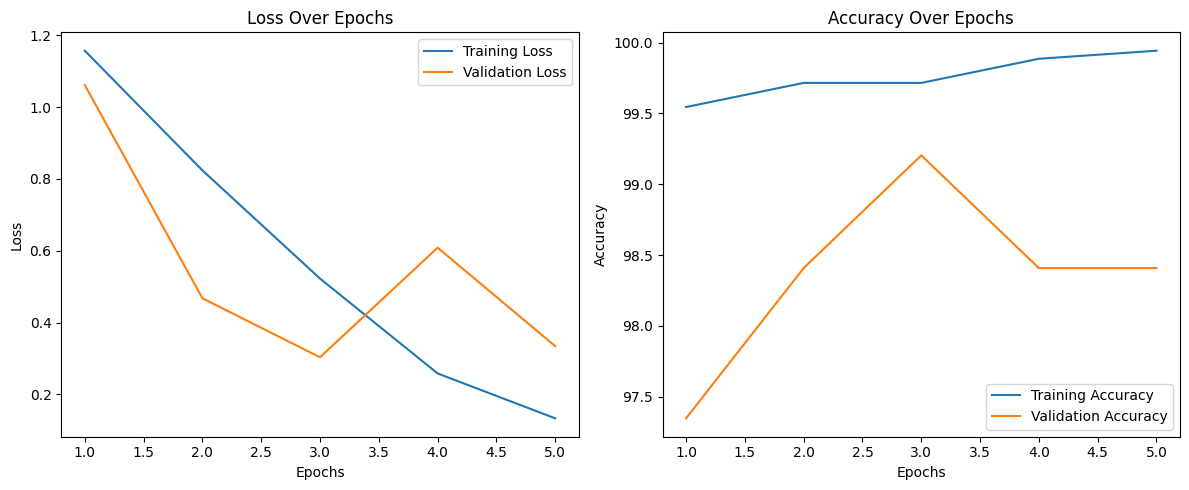

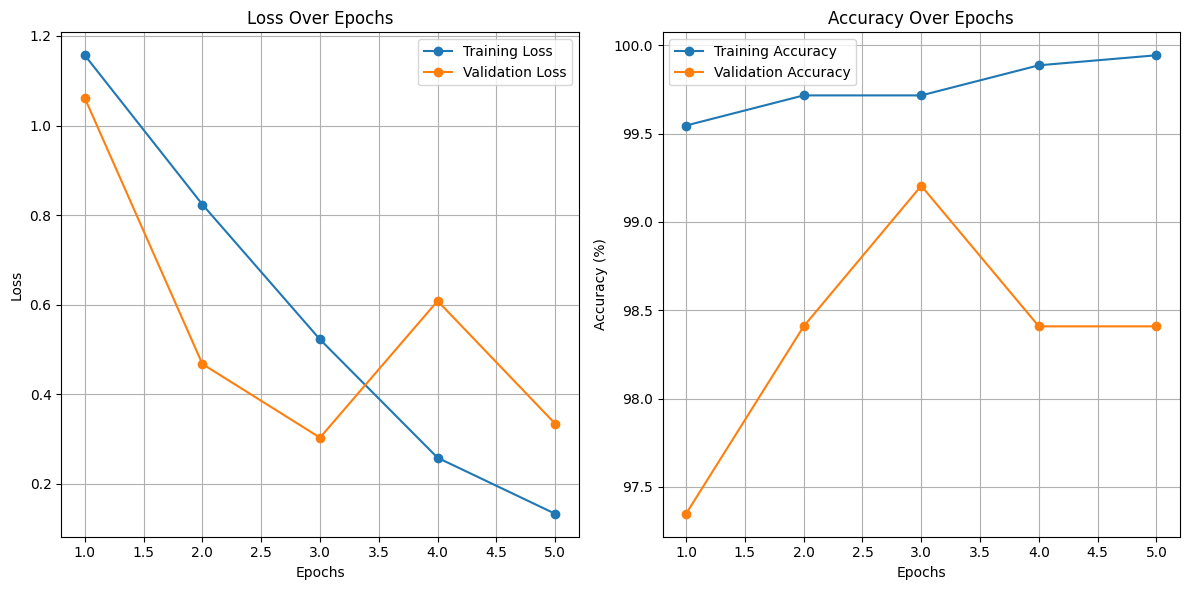


Bias-Variance Analysis:
Model is likely balanced, with comparable training and validation accuracies.


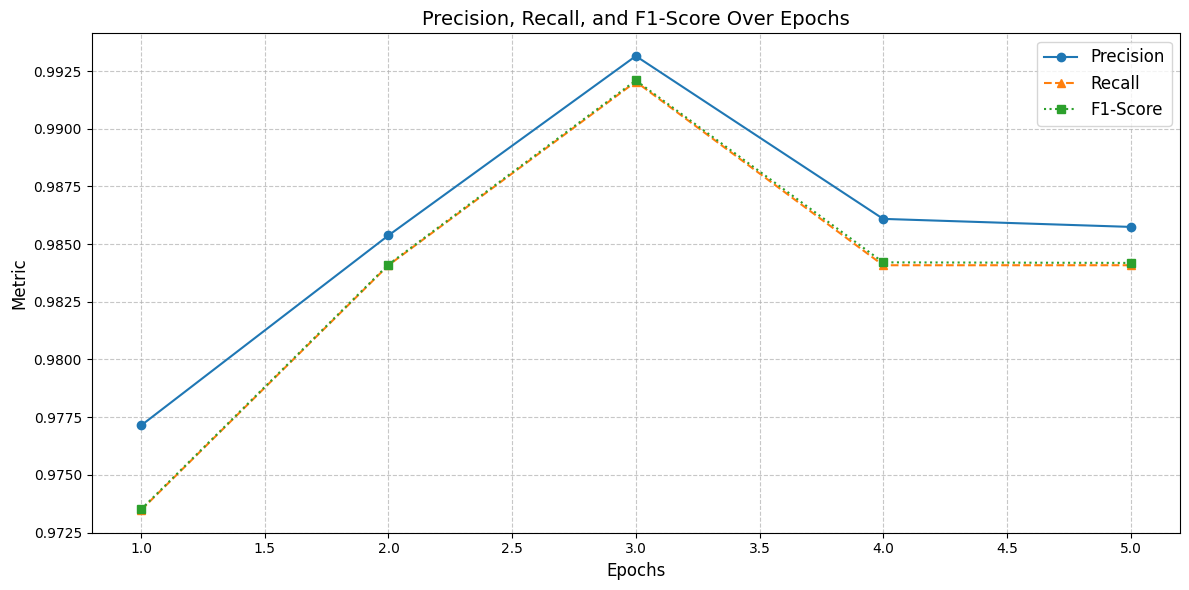


Final Classification Metrics:
Precision (Last Epoch): 0.99
Recall (Last Epoch): 0.98
F1-Score (Last Epoch): 0.98


<Figure size 1000x800 with 0 Axes>

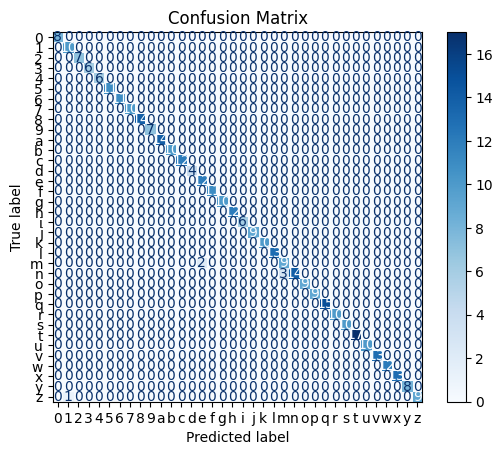

Model saved to asl_classifier_fine_tuned_layer3.pth
Model fine-tuned with layer3 unfrozen saved to asl_classifier_fine_tuned_layer3.pth
Validation loss increased after unfreezing layer3. Reverting to the best-performing model.
Model saved to asl_classifier_final_fine_tuned.pth

Fine-tuning complete. Best model saved to asl_classifier_final_fine_tuned.pth with validation loss: 0.2861


In [20]:
def fine_tune_pretrained():
    """
    Workflow for fine-tuning the pretrained model with early stopping and the ability to revert to the best-performing layer configuration.
    Includes visualization of training metrics for comparison.
    """
    # Configuration
    data_dir = "./asl_dataset/asl_dataset"
    validate_class_mapping(data_dir, list(map(str, range(10))) + list(map(chr, range(ord('a'), ord('z') + 1))))
    model_path = "asl_classifier_best_pretrained.pth"
    num_classes = 36
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    epochs = 5  # Fine-tuning epochs per stage
    batch_size = 32

    # Load dataset and transformations
    train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(15),
        transforms.RandomHorizontalFlip(),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    valid_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    train_dataset, valid_dataset, _ = prepare_pretrained_datasets(
        data_dir, list(map(str, range(10))) + list(map(chr, range(ord('a'), ord('z') + 1))),
        train_transform, valid_transform
    )

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    # Load the pretrained model
    model = load_model(PretrainedASLClassifierResNet18, model_path, num_classes=num_classes, device=device)
    model.to(device)

    print("\nModel loaded for fine-tuning:")
    print(model)

    # Initial optimizer, scheduler, and criterion
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)
    criterion = nn.CrossEntropyLoss()

    # Gradual unfreezing strategy
    layers_to_unfreeze = ['layer4', 'layer3']  # Limit to higher layers due to small dataset
    gradient_magnitudes = {layer_name: [] for layer_name in layers_to_unfreeze}  # Initialize gradient tracker
    best_val_loss = float('inf')  # Track the best validation loss
    best_model_state = None  # Save the best model state
    stop_fine_tuning = False  # Flag to stop fine-tuning if performance worsens

    for layer_name in layers_to_unfreeze:
        if stop_fine_tuning:
            print(f"Stopping early. Best validation loss: {best_val_loss:.4f}")
            break

        print(f"\nFine-tuning with {layer_name} unfrozen...")

        # Unfreeze the specified layer
        for name, param in model.named_parameters():
            if layer_name in name:
                param.requires_grad = True

        # Update optimizer to include newly unfrozen parameters
        optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)

        # Train the model with the current set of trainable parameters
        train_losses, valid_losses, train_acc, valid_acc, precisions, recalls, f1_scores, conf_matrix = train_fine_tuned_model(
            model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs, device
        )

        # **Visualizations for metrics**
        print("\nVisualizing metrics for this fine-tuning stage:")
        visualize_training_metrics(train_losses, valid_losses, train_acc, valid_acc)
        analyze_bias_variance(train_losses, valid_losses, train_acc, valid_acc)
        visualize_classification_metrics(precisions, recalls, f1_scores)
        visualize_confusion_matrix(conf_matrix, list(map(str, range(10))) + list(map(chr, range(ord('a'), ord('z') + 1))))

        # Save the model for the current stage
        model_save_path = f"asl_classifier_fine_tuned_{layer_name}.pth"
        save_model(model.state_dict(), model_save_path)
        print(f"Model fine-tuned with {layer_name} unfrozen saved to {model_save_path}")

        # Check validation performance for early stopping
        if valid_losses[-1] < best_val_loss:
            best_val_loss = valid_losses[-1]  # Update best validation loss
            best_model_state = model.state_dict()  # Save the best model state
            print(f"Best model updated with {layer_name} unfrozen.")
        else:
            print(f"Validation loss increased after unfreezing {layer_name}. Reverting to the best-performing model.")
            model.load_state_dict(best_model_state)  # Revert to the best model
            stop_fine_tuning = True

    # Save the final best model state
    final_model_path = "asl_classifier_final_fine_tuned.pth"
    save_model(best_model_state, final_model_path)
    print(f"\nFine-tuning complete. Best model saved to {final_model_path} with validation loss: {best_val_loss:.4f}")

    # # **Visualize feature maps for a sample input**
    # print("\nVisualizing feature maps for the fine-tuned model...")

    # # Specify the layers to visualize
    # layers_to_visualize = ['layer4.1.conv2', 'layer3.1.conv2']  # Example layers to visualize

    # # Get a sample input from the validation loader
    # sample_input, _ = next(iter(valid_loader))  # Get a batch of validation data
    # sample_input = sample_input[0].to(device)  # Take a single image and move it to the device

    # # No additional transformation needed since valid_loader applies them
    # visualize_feature_maps(
    #     model=model,
    #     sample=sample_input,
    #     layers=layers_to_visualize,
    #     transform=lambda x: x,  # No-op transform, sample already preprocessed
    #     device=device
    # )

if __name__ == "__main__":
    print("\nStarting Fine-Tuning Workflow...")
    fine_tune_pretrained()

# **Monitoring Validation Loss**

Validation loss measures how well the model performs on unseen data (not part of training).
The goal is for validation loss to decrease or remain stable as you train the model.

- A decreasing validation loss indicates the model is learning and generalizing well.

- An increasing validation loss suggests the model is overfitting or that further fine-tuning is hurting generalization.


# **Why Does Validation Loss Increase?**

There are a few reasons why unfreezing additional layers can cause validation loss to increase:

Overfitting:

- Fine-tuning deeper layers on a small dataset causes the model to memorize training data instead of generalizing to unseen data.

Unnecessary Fine-Tuning:

- Earlier layers of a pre-trained model (e.g., layer3) already capture generic features (edges, textures) well.
Fine-tuning these layers might disrupt those useful pre-trained representations.

Insufficient Data:

- Fine-tuning too many layers requires more training data to avoid overfitting.
With limited data, the model struggles to generalize.

# **Why Revert to the Best-Performing Model?**

Reverting ensures:

You retain the best model configuration where validation loss was lowest.
The model does not degrade further due to unnecessary or harmful fine-tuning.

# **Key Takeaways**

- Validation loss is your primary signal for deciding whether fine-tuning is helping or hurting the model.

- If validation loss increases after unfreezing a layer, the best approach is:
  - Stop unfreezing further layers.

  - Revert to the previously saved best model state.

This aligns with the principle of early stopping to prevent overfitting and ensures that the final model maintains its best generalization ability.